In [ ]:
import requests

service_key = "JTSYD9KXUZ1NGDIRZKYN"
stat_code = "901Y014"  # 주식시장
start = 1
end = 100  # 충분히 큰 값으로 지정

url = f"https://ecos.bok.or.kr/api/StatisticItemList/{service_key}/json/kr/{start}/{end}/{stat_code}"
response = requests.get(url)
item_data = response.json()['StatisticItemList']['row']

# 항목코드 및 이름 추출
item_list = [(item['ITEM_CODE'], item['ITEM_NAME']) for item in item_data if item['CYCLE'] == 'M']

In [ ]:
import pandas as pd

start_date = "200501"  # API에서 제공하는 가장 빠른 월간 데이터
end_date = "202402"

all_records = []

for code, name in item_list:
    print(f"Collecting: {name} ({code})")
    url = f"https://ecos.bok.or.kr/api/StatisticSearch/{service_key}/json/kr/1/1000/{stat_code}/M/{start_date}/{end_date}/{code}"
    res = requests.get(url)
    if res.status_code == 200:
        data = res.json()
        if 'row' in data.get('StatisticSearch', {}):
            for row in data['StatisticSearch']['row']:
                all_records.append({
                    "DATE": pd.to_datetime(row['TIME'], format="%Y%m"),
                    "ITEM_NAME": row.get('ITEM_NAME1'),  # ← 여기 수정!
                    "VALUE": float(row['DATA_VALUE'].replace(',', '')) if row['DATA_VALUE'] else None,
                    "UNIT": row.get('UNIT_NAME')
                })


Collecting: KOSPI_회사수 (1010000)
Collecting: KOSPI_종목수 (1020000)
Collecting: KOSPI_상장주식수 (1030000)
Collecting: KOSPI_시가총액 (1040000)
Collecting: KOSPI_거래량 (1050000)
Collecting: KOSPI_거래대금 (1060000)
Collecting: KOSPI_종가 (1070000)
Collecting: KOSPI_평균 (1080000)
Collecting: KOSPI_상장주식 회전율 1) (1090000)
Collecting: KOSPI_배당수익률 2) (1100000)
Collecting: KOSPI_주가이익비율 3) (1110000)
Collecting: KOSDAQ_회사수 (2010000)
Collecting: KOSDAQ_종목수 (2020000)
Collecting: KOSDAQ_상장주식수 (2030000)
Collecting: KOSDAQ_시가총액 (2040000)
Collecting: KOSDAQ_거래량 (2050000)
Collecting: KOSDAQ_거래대금 (2060000)
Collecting: KOSDAQ_거래량 일평균 (2070000)
Collecting: KOSDAQ_거래대금 일평균 (2080000)
Collecting: KOSDAQ_종가 (2090000)
Collecting: KOSDAQ_평균 (2100000)
Collecting: KOSDAQ_상장주식 회전율 (2110000)
Collecting: KOSPI_거래대금 일평균 (1060200)
Collecting: KOSPI_거래량 일평균 (1060100)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# CSV 파일 경로 설정
file_path1 = '/content/drive/MyDrive/데이터프로젝트/소비지출,취업기회,임금수준전망전체.csv'
file_path2 = '/content/drive/MyDrive/데이터프로젝트/소비지출,임금수준,취업기회 전망40세미만.csv'

# CSV 파일 읽기
df1 = pd.read_csv(file_path1) #전체
df2 = pd.read_csv(file_path2) #40세 미만

# 데이터 확인 (선택)
print(df1.head())
print(df2.head())


                              통계표        CSI코드 CSI분류코드  단위   변환  2022/01  \
0  6.2.1. 소비자동향조사(전국, 월, 2008.9~)    소비지출전망CSI      전체 NaN  원자료      111   
1  6.2.1. 소비자동향조사(전국, 월, 2008.9~)    취업기회전망CSI      전체 NaN  원자료       92   
2  6.2.1. 소비자동향조사(전국, 월, 2008.9~)    임금수준전망CSI      전체 NaN  원자료      118   

   2022/02  2022/03  2022/04  2022/05  ...  2024/03  2024/04  2024/05  \
0      110      114      114      116  ...      111      110      109   
1       93       94       94       95  ...       84       85       83   
2      117      113      116      117  ...      116      117      116   

   2024/06  2024/07  2024/08  2024/09  2024/10  2024/11  2024/12  
0      109      111      109      108      109      109      102  
1       85       86       83       83       83       79       65  
2      116      118      120      117      119      118      115  

[3 rows x 41 columns]
                              통계표        CSI코드    CSI분류코드  단위   변환  2022/01  \
0  6.2.1. 소비자동향조사(전국, 월, 2008.9~

In [ ]:
import requests
import xml.etree.ElementTree as ET
from urllib.parse import quote

#검색어 설정 (이 부분만 바꿔가며 사전처럼 사용 가능)
search_word = "소비자동향지수"
service_key = ""
start = "1"
end = "10"

#한글 인코딩 처리
encoded_word = quote(search_word)

#ECOS API 요청 URL
url = f"https://ecos.bok.or.kr/api/StatisticWord/%7Bservice_key%7D/xml/kr/%7Bstart%7D/%7Bend%7D/%7Bencoded_word%7D"
response = requests.get(url)
xml_data = response.text

#XML 파싱
root = ET.fromstring(xml_data)

#결과 추출 및 출력
for row in root.findall(".//row"):
    word_element = row.find("WORD")
    content_element = row.find("CONTENT")

    word = word_element.text if word_element is not None else "(용어 없음)"
    content = content_element.text if content_element is not None else "(설명 없음)"

    print(f"[{word}]\n{content}\n")

# **소득지출CSI 전체 VS 40미만 비교 시각화**

<ipython-input-7-fb092277bcee>:23: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-fb092277bcee>:23: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-fb092277bcee>:23: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-fb092277bcee>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-fb092277bcee>:23: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-fb092277bcee>:23: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-fb092277bcee>:23: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-

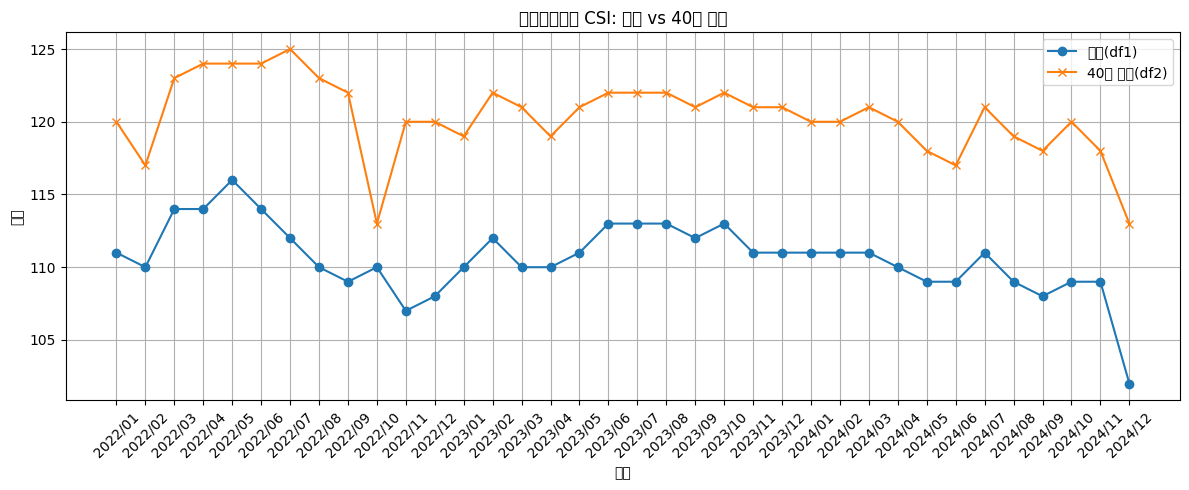

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 타겟 CSI 항목
target = '소비지출전망CSI'
date_columns = df1.columns[5:]

# 값 추출
values1 = df1[df1['CSI코드'].str.contains(target, na=False)][date_columns].values.flatten().astype(float)
values2 = df2[df2['CSI코드'].str.contains(target, na=False)][date_columns].values.flatten().astype(float)

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(date_columns, values1, label='전체(df1)', marker='o')
plt.plot(date_columns, values2, label='40세 미만(df2)', marker='x')

plt.title('소비지출전망 CSI: 전체 vs 40세 미만')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# **취업기회전망CSI 전체 VS 40미만 비교 시각화**

<ipython-input-8-8fe81ee0fb8f>:20: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-8fe81ee0fb8f>:20: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-8fe81ee0fb8f>:20: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-8fe81ee0fb8f>:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-8fe81ee0fb8f>:20: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-8fe81ee0fb8f>:20: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-8fe81ee0fb8f>:20: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8

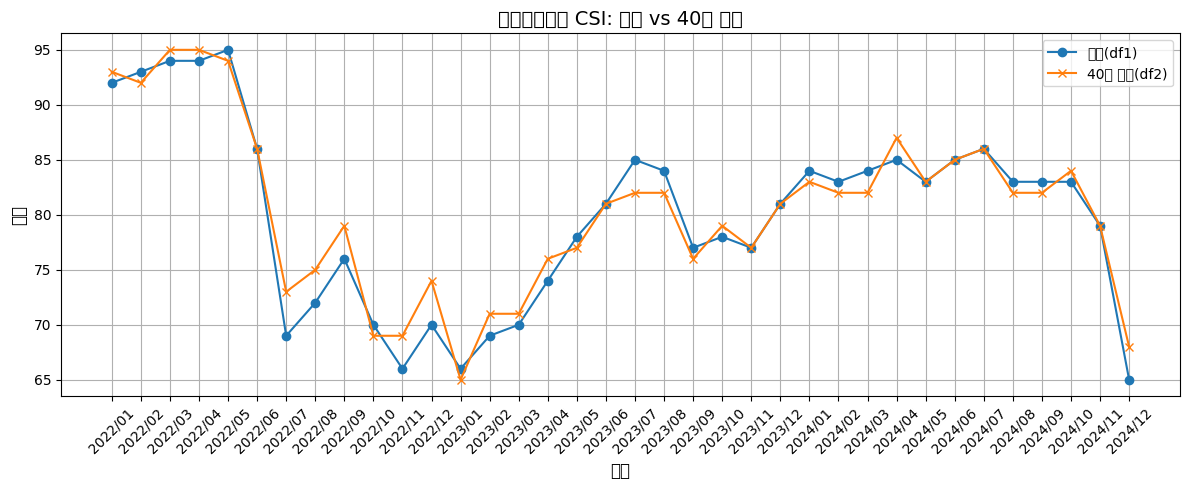

In [ ]:
# 타겟 CSI 항목
target = '취업기회전망CSI'
date_columns = df1.columns[5:]  # '2022/01' ~ '2024/12'

# 값 추출 (포함 여부로 필터링)
values1 = df1[df1['CSI코드'].str.contains(target, na=False)][date_columns].values.flatten().astype(float)
values2 = df2[df2['CSI코드'].str.contains(target, na=False)][date_columns].values.flatten().astype(float)

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(date_columns, values1, label='전체(df1)', marker='o')
plt.plot(date_columns, values2, label='40세 미만(df2)', marker='x')

plt.title('취업기회전망 CSI: 전체 vs 40세 미만', fontsize=14)
plt.xlabel('기간', fontsize=12)
plt.ylabel('지수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **임금수준CSI 전체 VS 40미만 비교 시각화**

<ipython-input-9-d5c3a697a4d7>:20: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-d5c3a697a4d7>:20: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-d5c3a697a4d7>:20: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-d5c3a697a4d7>:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-d5c3a697a4d7>:20: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-d5c3a697a4d7>:20: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-d5c3a697a4d7>:20: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9

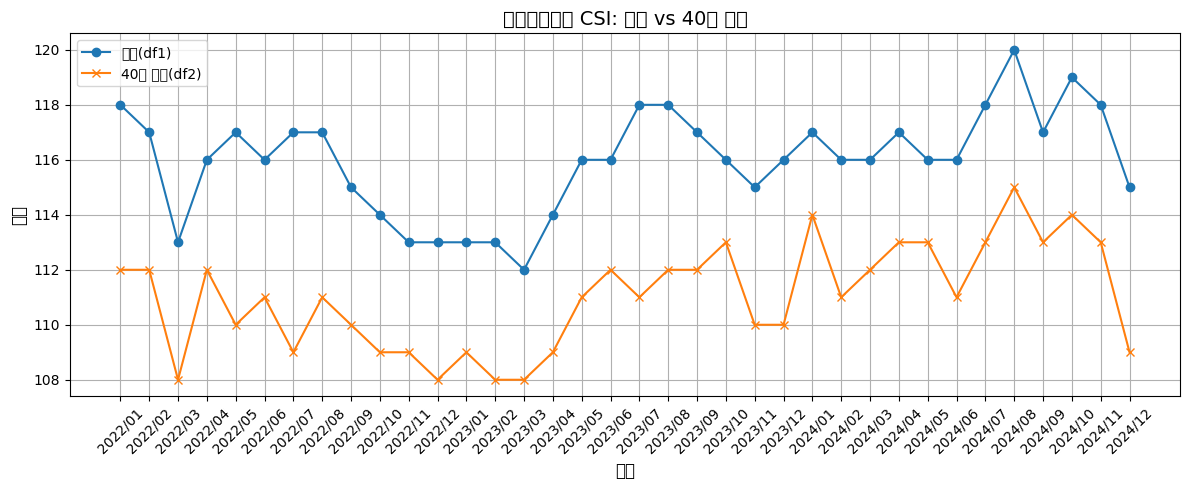

In [ ]:
# 타겟 CSI 항목
target = '임금수준전망CSI'
date_columns = df1.columns[5:]  # '2022/01' ~ '2024/12'

# 값 추출 (포함 여부로 필터링)
values1 = df1[df1['CSI코드'].str.contains(target, na=False)][date_columns].values.flatten().astype(float)
values2 = df2[df2['CSI코드'].str.contains(target, na=False)][date_columns].values.flatten().astype(float)

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(date_columns, values1, label='전체(df1)', marker='o')
plt.plot(date_columns, values2, label='40세 미만(df2)', marker='x')

plt.title('임금수준전망 CSI: 전체 vs 40세 미만', fontsize=14)
plt.xlabel('기간', fontsize=12)
plt.ylabel('지수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 첫 번째 CSV 파일 불러오기 (인코딩 지정)
df1 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/연령별_경제활동인구_총괄_20250418144400.csv', encoding='cp949')

# 두 번째 CSV 파일 불러오기 (인코딩 지정)
file_path_2 = '/content/drive/MyDrive/데이터프로젝트/20~39 고용률 실업률.csv'
# utf-8-sig 시도
df2 = pd.read_csv(file_path_2, encoding='utf-8-sig')


# 데이터 확인
print(df1.head())
print(df2.head())


           날짜  실업률   고용률
0  2020-01-01  4.1  60.0
1  2020-02-01  4.1  60.0
2  2020-03-01  4.2  59.5
3  2020-04-01  4.2  59.4
4  2020-05-01  4.5  60.2
           날짜  실업률   고용률
0  2020-01-01  4.8  95.2
1  2020-02-01  5.7  94.3
2  2020-03-01  5.9  94.1
3  2020-04-01  5.8  94.2
4  2020-05-01  6.6  93.4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

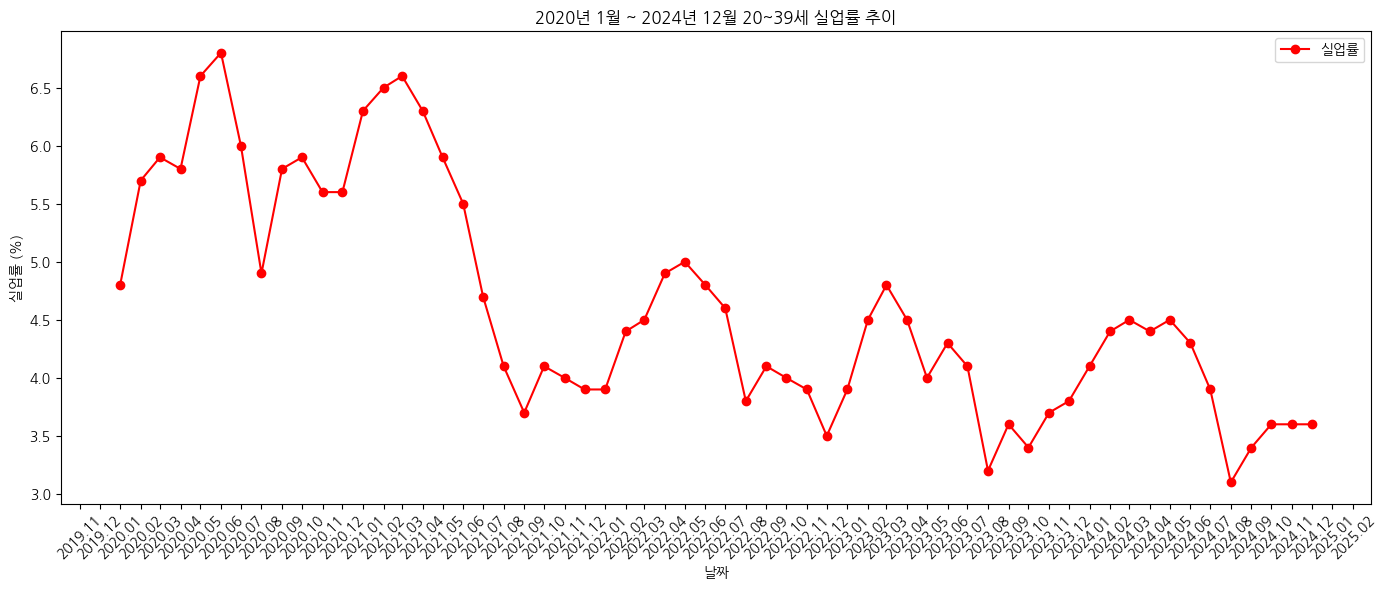

In [ ]:

import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.dates as mdates


# ===== 데이터 불러오기 =====
file_path_2 = '/content/drive/MyDrive/데이터프로젝트/20~39 고용률 실업률.csv'
df_youth = pd.read_csv(file_path_2)

# 날짜 형식 변환
df_youth['날짜'] = pd.to_datetime(df_youth['날짜'], format='%Y-%m-%d')

# ===== 시각화 =====
plt.figure(figsize=(14, 6))
plt.plot(df_youth['날짜'], df_youth['실업률'], marker='o', label='실업률', color='red')

# x축 1개월 간격, 포맷 yyyy.mm
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 1개월 단위
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))

# 시각 설정
plt.xticks(rotation=45)
plt.xlabel('날짜')
plt.ylabel('실업률 (%)')
plt.title('2020년 1월 ~ 2024년 12월 20~39세 실업률 추이')
plt.legend()
plt.tight_layout()
plt.show()



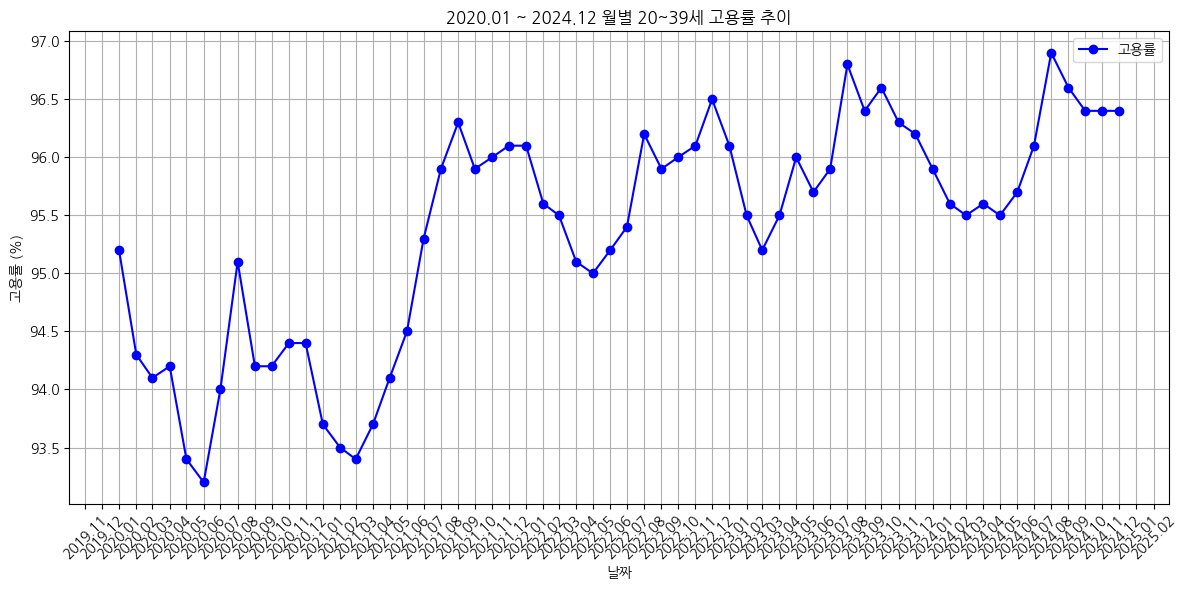

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로
file_path_2 = '/content/drive/MyDrive/데이터프로젝트/20~39 고용률 실업률.csv'

# 데이터 로드
df_youth = pd.read_csv(file_path_2)

# 날짜 형식 변환
df_youth['날짜'] = pd.to_datetime(df_youth['날짜'], format='%Y-%m-%d')

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_youth['날짜'], df_youth['고용률'], marker='o', label='고용률', color='blue')

# x축 설정: 1개월 간격으로 표시
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))

# 라벨 설정 (한글)
plt.xlabel('날짜')
plt.ylabel('고용률 (%)')
plt.title('2020.01 ~ 2024.12 월별 20~39세 고용률 추이')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)

# 그래프 출력
plt.show()


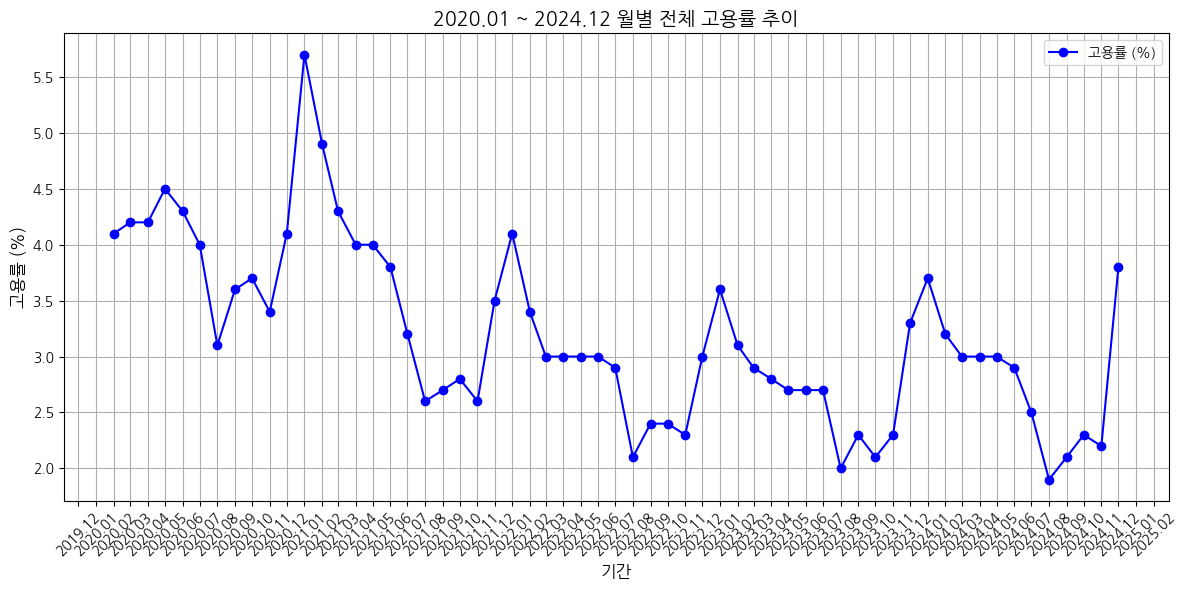

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV 파일 읽기 (인코딩 지정 🔥)
df1 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/연령별_경제활동인구_총괄_20250418144400.csv', encoding='cp949')

# 첫 번째 행을 컬럼명으로 설정하고 제거
df1.columns = df1.iloc[0]
df1 = df1.drop(0)

# 컬럼명 정리
df1.columns = ['날짜', '고용률', '실업률']
df1 = df1[['날짜', '고용률']]

# 날짜 형식 변환
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df1['날짜'], df1['고용률'], marker='o', color='b', label='고용률 (%)')

plt.title('2020.01 ~ 2024.12 월별 전체 고용률 추이', fontsize=14)
plt.xlabel('기간', fontsize=12)
plt.ylabel('고용률 (%)', fontsize=12)
plt.grid(True)

# 🔹 x축: 1개월 단위로 표시
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()





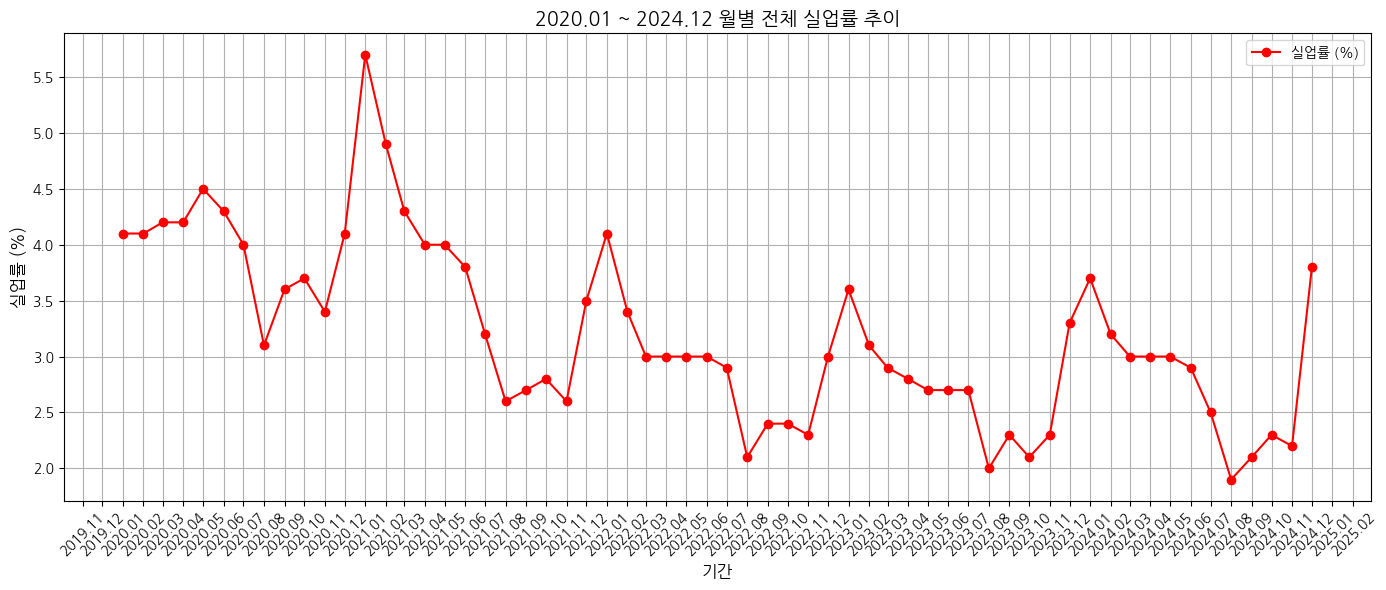

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV 파일 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/연령별_경제활동인구_총괄_20250418144400.csv', encoding='cp949')

# 날짜 컬럼 datetime 형식으로 변환
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 실업률 컬럼을 숫자로 변환 (혹시 모를 문자열 포함 대비)
df1['실업률'] = pd.to_numeric(df1['실업률'], errors='coerce')

# ===== 시각화 =====
plt.figure(figsize=(14, 6))
plt.plot(df1['날짜'], df1['실업률'], marker='o', color='red', label='실업률 (%)')

plt.title('2020.01 ~ 2024.12 월별 전체 실업률 추이', fontsize=14)
plt.xlabel('기간', fontsize=12)
plt.ylabel('실업률 (%)', fontsize=12)

# X축을 1개월 간격으로, 포맷은 년.월
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **CCSI와 전체 CSI 40세미만 CSI 상관관게 분석**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 드라이브 경로를 포함한 파일 경로 지정
file_path = '/content/drive/MyDrive/데이터프로젝트/소비자동향조사(전국, 월, 2008.9~)_21134729.xlsx'

# Excel 파일 불러오기
df = pd.read_excel(file_path)

# 데이터 확인
df.head()


,날짜,가계부채전망CSI,가계저축전망CSI,물가수준전망(1년후)CSI,임금수준전망CSI,주택가격전망CSI,현재가계부채CSI,현재가계저축CSI,소비자심리지수
0,2020/01,98,97,139,119,116,100,95,105.4
1,2020/02,98,96,137,116,112,99,94,97.9
2,2020/03,99,90,134,109,112,100,88,79.3
3,2020/04,102,87,132,102,96,104,84,71.5
4,2020/05,100,88,131,104,96,102,86,78.4


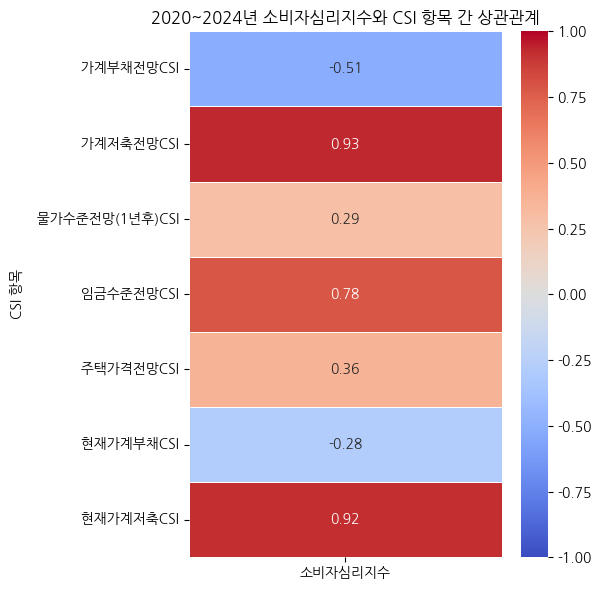

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 엑셀 파일 불러오기
file_path = '/content/drive/MyDrive/데이터프로젝트/소비자동향조사(전국, 월, 2008.9~)_21134729.xlsx'
df = pd.read_excel(file_path)

# 2. 첫 번째 열 이름을 '날짜'로 바꾸고 datetime 형식으로 변환
df.rename(columns={df.columns[0]: '날짜'}, inplace=True)
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y/%m', errors='coerce')

# 3. 2020/01 ~ 2024/12 기간 필터링
start_date = '2020-01-01'
end_date = '2024-12-31'
df_filtered = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].copy()

# 4. 날짜 제외한 수치형 컬럼만 추출
df_numeric = df_filtered.drop(columns=['날짜'])

# 5. 상관관계 계산
correlation_matrix = df_numeric.corr()

# 6. 소비자심리지수와 다른 변수 간 상관관계 추출
consumer_corr = correlation_matrix[['소비자심리지수']].drop(index='소비자심리지수')

# 7. 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(consumer_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('2020~2024년 소비자심리지수와 CSI 항목 간 상관관계')
plt.ylabel('CSI 항목')
plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

# 드라이브 경로를 포함한 파일 경로 지정
file_path = '/content/drive/MyDrive/데이터프로젝트/소비자동향 40미만.xlsx'

# Excel 파일 불러오기
df1 = pd.read_excel(file_path)

# 데이터 확인
df.head()

,날짜,가계부채전망CSI,가계저축전망CSI,물가수준전망(1년후)CSI,임금수준전망CSI,주택가격전망CSI,현재가계부채CSI,현재가계저축CSI,소비자심리지수
0,2020-01-01,98,97,139,119,116,100,95,105.4
1,2020-02-01,98,96,137,116,112,99,94,97.9
2,2020-03-01,99,90,134,109,112,100,88,79.3
3,2020-04-01,102,87,132,102,96,104,84,71.5
4,2020-05-01,100,88,131,104,96,102,86,78.4


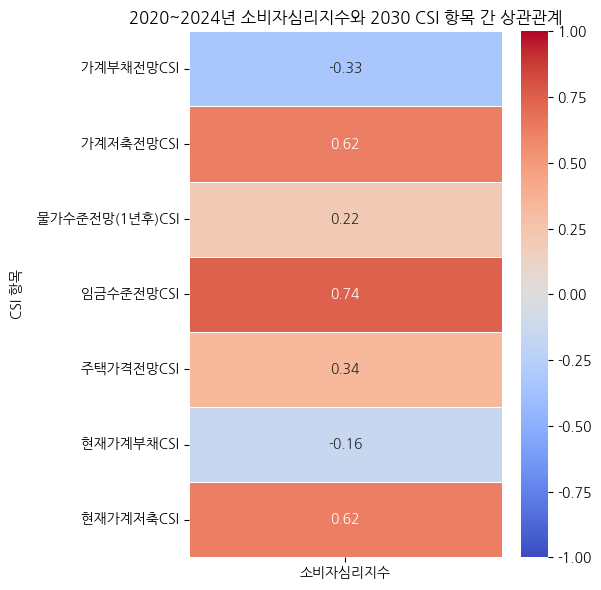

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 날짜 형식 변환 (연/월만 있을 경우 '-01' 붙이기)
df1['날짜'] = pd.to_datetime(df1['날짜'].astype(str) + '-01', format='%Y/%m-%d')

# 3. 2020/01 ~ 2024/12 기간 필터링
df_filtered = df1[(df1['날짜'] >= '2020-01-01') & (df1['날짜'] <= '2024-12-31')].copy()

# 4. 수치형 데이터만 추출
df_numeric = df_filtered.drop(columns=['날짜'])

# 5. 상관관계 계산
correlation_matrix = df_numeric.corr()

# 6. 소비자심리지수와 다른 항목 간 상관관계만 추출
consumer_corr = correlation_matrix[['소비자심리지수']].drop(index='소비자심리지수')

# 7. 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(consumer_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('2020~2024년 소비자심리지수와 2030 CSI 항목 간 상관관계')
plt.ylabel('CSI 항목')
plt.tight_layout()
plt.show()

# **주제 변경후 다시 EDA**

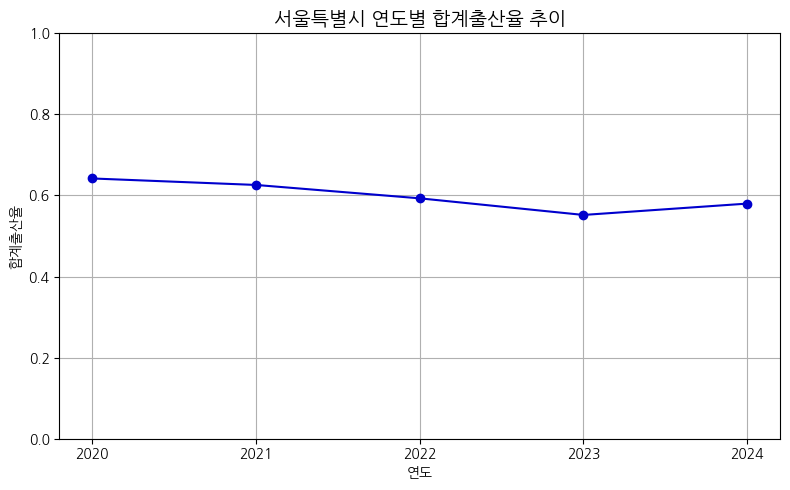

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/시군구_출생아수__합계출산율_20250422114226.csv', encoding='utf-8')

# 데이터 정리
df_clean = df.iloc[1:].copy()
df_clean.columns = ['시군구', '2020', '2021', '2022', '2023', '2024']
df_melted = df_clean.melt(id_vars='시군구', var_name='연도', value_name='합계출산율')
df_melted['합계출산율'] = pd.to_numeric(df_melted['합계출산율'], errors='coerce')
seoul_df = df_melted[df_melted['시군구'] == '서울특별시']

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(seoul_df['연도'], seoul_df['합계출산율'], marker='o', linestyle='-', color='mediumblue')
plt.title('서울특별시 연도별 합계출산율 추이', fontsize=14)
plt.xlabel('연도')
plt.ylabel('합계출산율')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/데이터프로젝트/선행종합지수(국내).xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/데이터프로젝트/미분양주택현황(서울).xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/데이터프로젝트/주택건설인허가실적(서울).xlsx')


In [ ]:
for i, df in enumerate([df1, df2, df3], start=1):
    print(f"\n[DF{i}] 데이터 타입 및 결측치 확인")
    print(df.info())
    print(df.head())


[DF1] 데이터 타입 및 결측치 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      60 non-null     object 
 1   선행종합지수  60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None
        날짜  선행종합지수
0  2020/01    98.3
1  2020/02    98.6
2  2020/03    98.5
3  2020/04    98.5
4  2020/05    98.5

[DF2] 데이터 타입 및 결측치 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      60 non-null     object
 1   서울      60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
        날짜   서울
0  2020/01  131
1  2020/02  112
2  2020/03   91
3  2020/04   78
4  2020/05   70

[DF3] 데이터 타입 및 결측치 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column

In [ ]:
def detect_outliers_iqr(df):
    outlier_info = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        outlier_info[col] = len(outliers)
    return outlier_info

for i, df in enumerate([df1, df2, df3], start=1):
    print(f"\n[DF{i}] 이상치 개수")
    print(detect_outliers_iqr(df))



[DF1] 이상치 개수
{'선행종합지수': 0}

[DF2] 이상치 개수
{'서울': 0}

[DF3] 이상치 개수
{'  서울': 2}


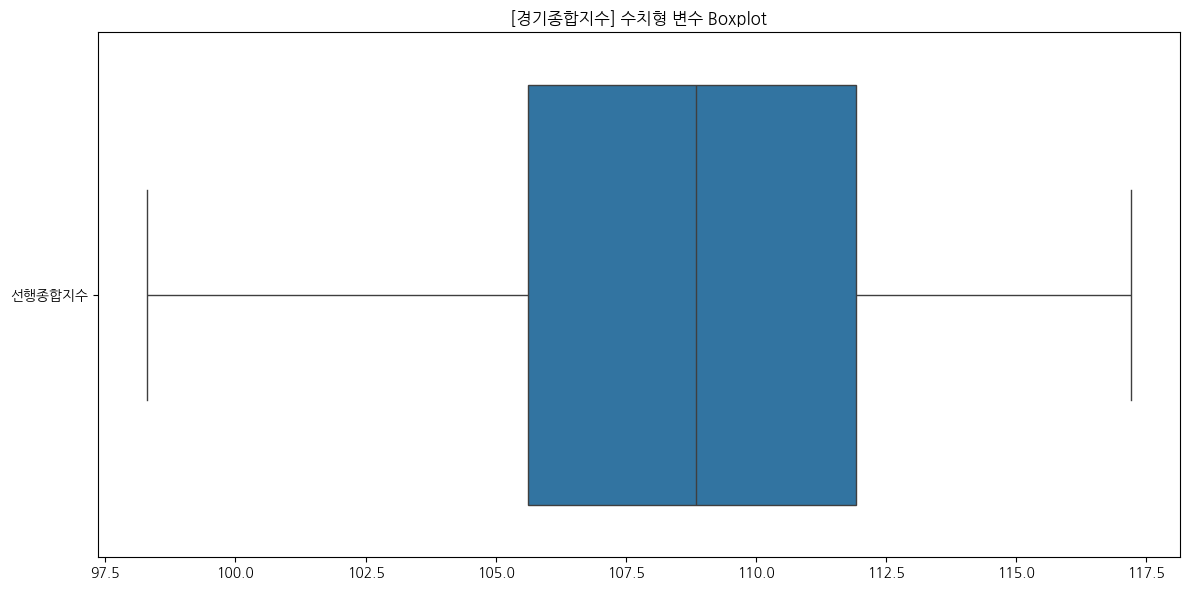

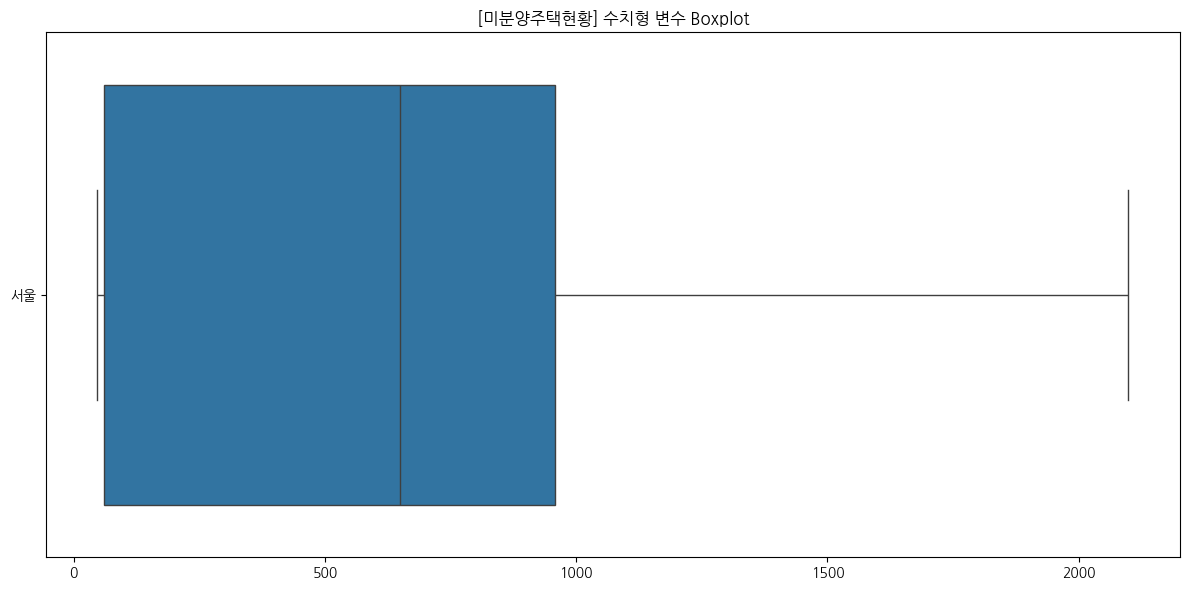

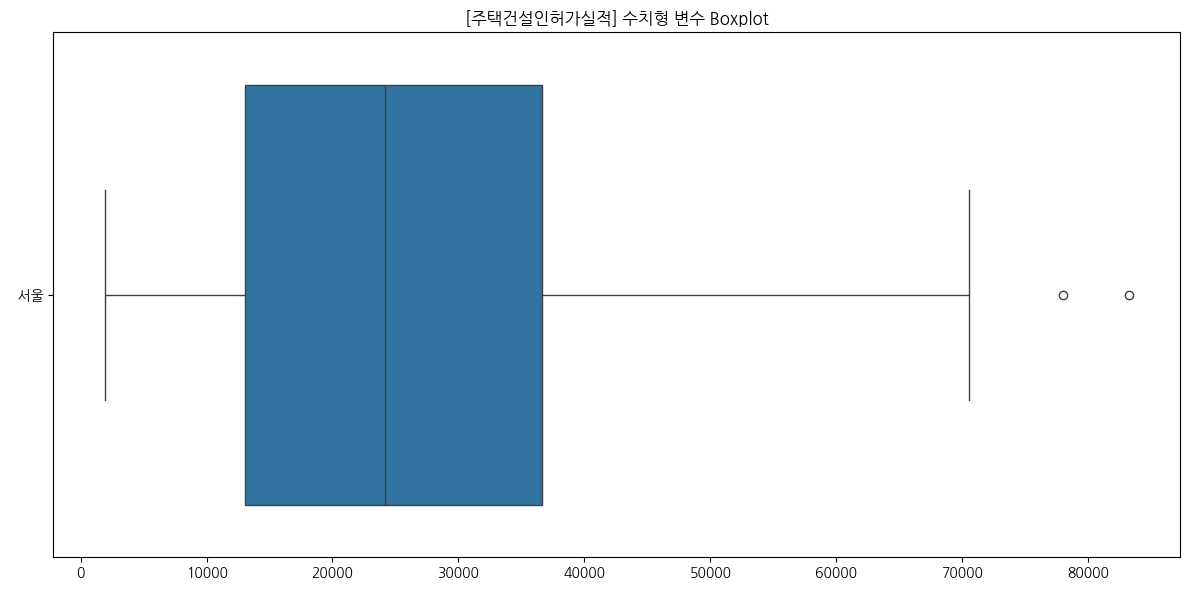

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dataframes = [df1, df2, df3]
titles = ['경기종합지수', '미분양주택현황', '주택건설인허가실적']

for i, df in enumerate(dataframes):
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) == 0:
        print(f"\n[{titles[i]}] 수치형 변수 없음")
        continue

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[num_cols], orient='h')
    plt.title(f"[{titles[i]}] 수치형 변수 Boxplot")
    plt.tight_layout()
    plt.show()


In [ ]:
# 날짜 열을 datetime 형식으로 변환
df1['날짜'] = pd.to_datetime(df1['날짜'], format='%Y/%m')
df2['날짜'] = pd.to_datetime(df2['날짜'], format='%Y/%m')
df3['날짜'] = pd.to_datetime(df3['날짜'], format='%Y/%m')


# **국내 선행종합지수 시각화**

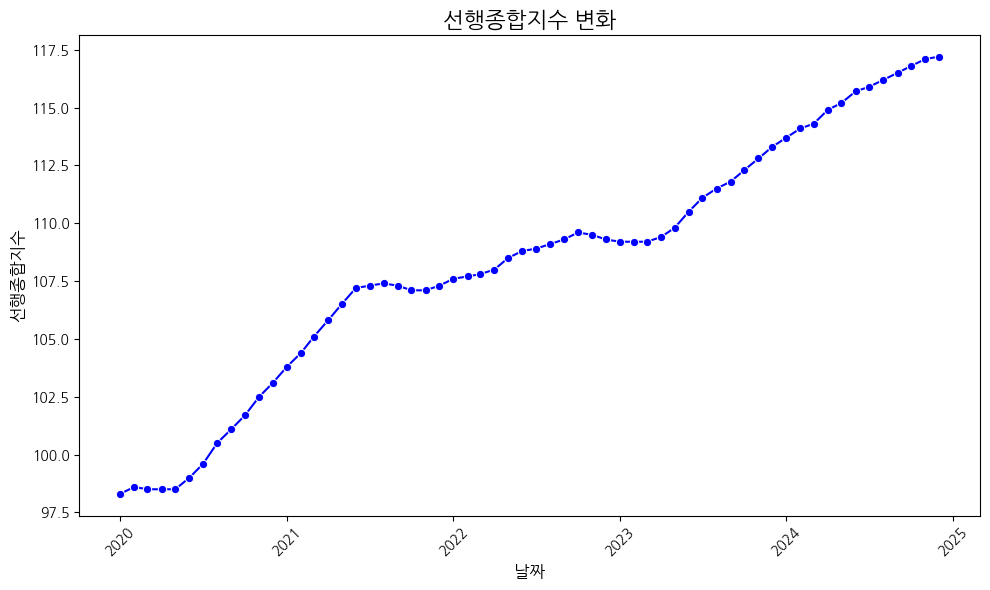

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 선행종합지수 시각화 (df1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='날짜', y='선행종합지수', marker='o', color='b')

# 제목과 레이블 설정
plt.title('선행종합지수 변화', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('선행종합지수', fontsize=12)

# X축 날짜 포맷 설정
plt.xticks(rotation=45)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


# **서울 미분양주택현황 시각화**

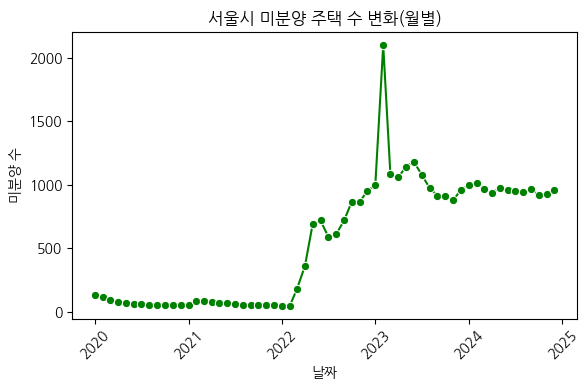

In [ ]:
# 미분양 시각화 (df2)
plt.figure(figsize=(6,4))
sns.lineplot(data=df2, x='날짜', y='서울', marker='o', color='g')

# 제목과 레이블 설정
plt.title('서울시 미분양 주택 수 변화(월별)')
plt.xlabel('날짜')
plt.ylabel('미분양 수')

# X축 날짜 포맷 설정
plt.xticks(rotation=45)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


# **서울 주택거래인허가실적 시각화**

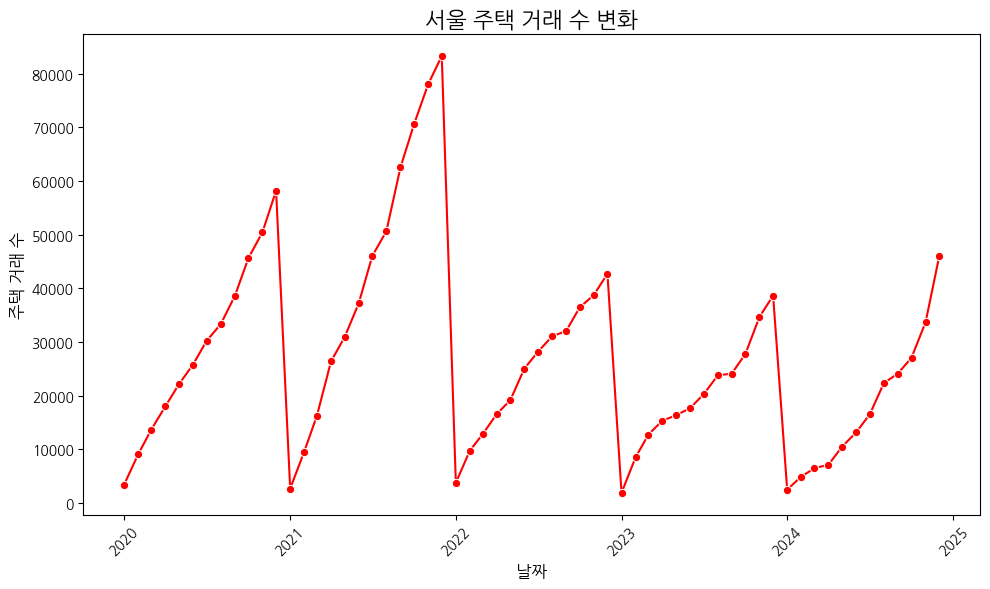

In [ ]:
# 열 이름 공백 제거
df3.columns = df3.columns.str.strip()

# 주택거래 시각화 (df3)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df3, x='날짜', y='서울', marker='o', color='r')

# 제목과 레이블 설정
plt.title('서울 주택 거래 수 변화', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('주택 거래 수', fontsize=12)

# X축 날짜 포맷 설정
plt.xticks(rotation=45)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

#누저


In [ ]:
df4 = pd.read_excel('/content/drive/MyDrive/데이터프로젝트/국내실질총생산_GDP_월별.xlsx')

df4.head()

,날짜,국내총생산실질GDP
0,2020-01,-1.3
1,2020-02,-1.3
2,2020-03,-1.3
3,2020-04,-2.7
4,2020-05,-2.7


In [ ]:
# 날짜 열을 datetime 형식으로 변환
df4['날짜'] = pd.to_datetime(df4['날짜'])


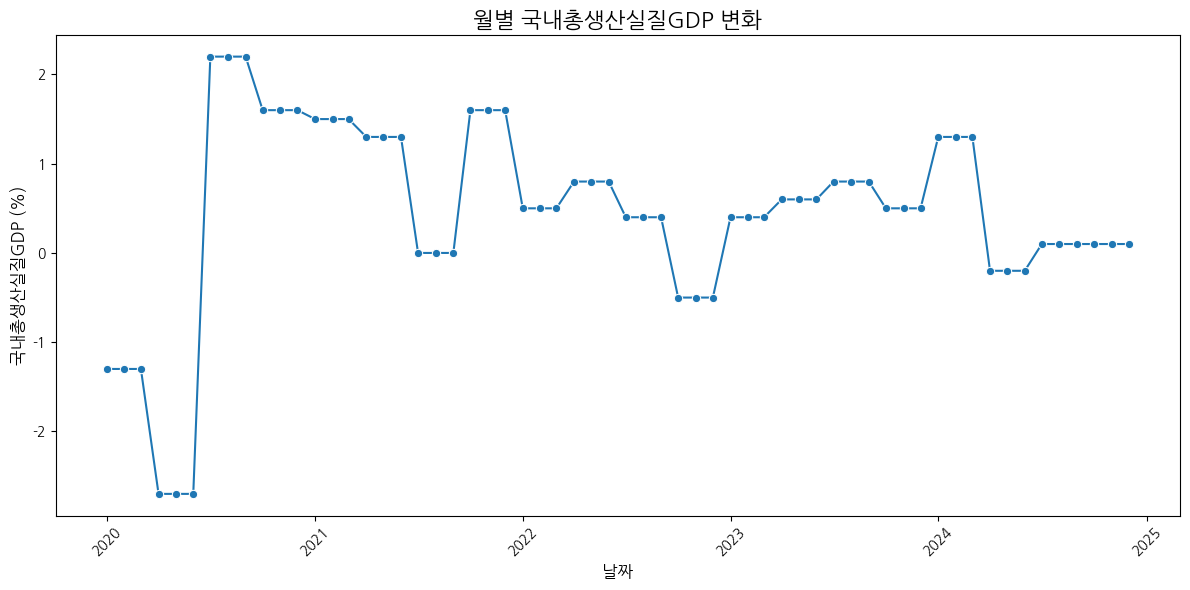

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(12, 6))
sns.lineplot(data=df4, x='날짜', y='국내총생산실질GDP', marker='o')

# 제목과 레이블 설정
plt.title('월별 국내총생산실질GDP 변화', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('국내총생산실질GDP (%)', fontsize=12)

# X축 날짜 포맷 설정
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [ ]:
df5 = pd.read_excel('/content/drive/MyDrive/데이터프로젝트/유형별 가격지수(서울).xlsx')

df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          60 non-null     object 
 1   주택매매가격지수    60 non-null     float64
 2   주택전세가격지수    60 non-null     float64
 3   주택월세통합가격지수  60 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


,날짜,주택매매가격지수,주택전세가격지수,주택월세통합가격지수
0,2020/01,95.1,94.9,98.4
1,2020/02,95.2,95.0,98.5
2,2020/03,95.3,95.1,98.5
3,2020/04,95.3,95.2,98.5
4,2020/05,95.2,95.2,98.5


날짜            0
주택매매가격지수      0
주택전세가격지수      0
주택월세통합가격지수    0
dtype: int64


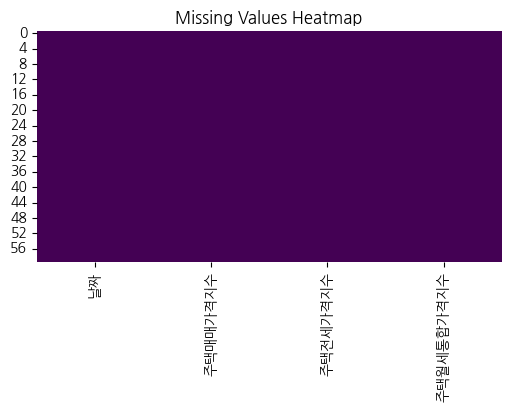

In [ ]:
# 결측치 개수 확인
print(df5.isnull().sum())

# 결측치 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.heatmap(df5.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


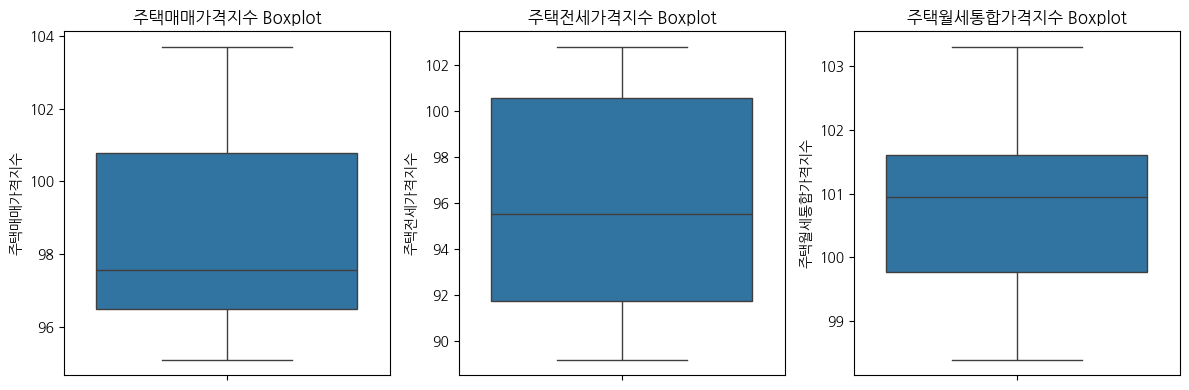


Z-score 기반 이상치 개수:
주택매매가격지수: 0개
주택전세가격지수: 0개
주택월세통합가격지수: 0개


In [ ]:
from scipy import stats
import numpy as np

# 박스플롯 시각화
plt.figure(figsize=(12, 4))
for i, col in enumerate(df5.columns[1:]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df5[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

# Z-score를 활용한 이상치 탐지
z_scores = np.abs(stats.zscore(df5.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)  # Z-score 3 초과를 이상치로 간주
outlier_counts = np.sum(outliers, axis=0)

print("\nZ-score 기반 이상치 개수:")
for col, count in zip(df5.columns[1:], outlier_counts):
    print(f"{col}: {count}개")


In [ ]:
# 날짜 형식 통일 (두 데이터프레임 모두)
df1['날짜'] = pd.to_datetime(df1['날짜'])  # 혹시 모르니 재확인
df5['날짜'] = pd.to_datetime(df5['날짜'], format='%Y/%m')

# 병합
merged_df1 = pd.merge(df1, df5, on='날짜')
merged_df1.head()


,날짜,선행종합지수,주택매매가격지수,주택전세가격지수,주택월세통합가격지수
0,2020-01-01,98.3,95.1,94.9,98.4
1,2020-02-01,98.6,95.2,95.0,98.5
2,2020-03-01,98.5,95.3,95.1,98.5
3,2020-04-01,98.5,95.3,95.2,98.5
4,2020-05-01,98.5,95.2,95.2,98.5


In [ ]:
# 상관관계 계산
corr1 = merged_df1[['선행종합지수', '주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']].corr()

print("상관관계 행렬:")
print(corr1)


상관관계 행렬:
              선행종합지수  주택매매가격지수  주택전세가격지수  주택월세통합가격지수
선행종합지수      1.000000  0.167276 -0.353208    0.905068
주택매매가격지수    0.167276  1.000000  0.835375    0.481687
주택전세가격지수   -0.353208  0.835375  1.000000   -0.027151
주택월세통합가격지수  0.905068  0.481687 -0.027151    1.000000


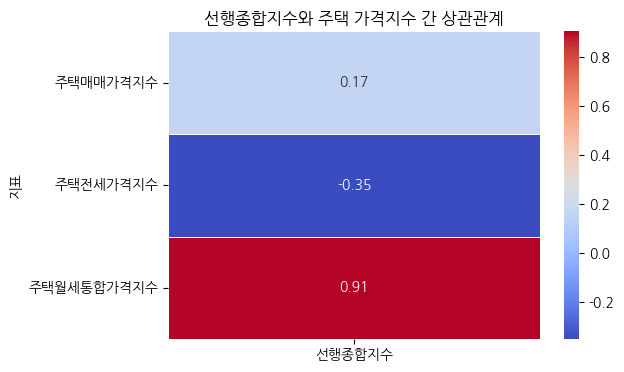

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선행종합지수 기준 상관계수만 추출
target_corr1 = corr1[['선행종합지수']].drop(index='선행종합지수')  # 자기 자신 제외

plt.figure(figsize=(6, 4))
sns.heatmap(target_corr1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("선행종합지수와 주택 가격지수 간 상관관계")
plt.ylabel("지표")
plt.show()



In [ ]:
# 날짜 기준 병합
merged_df2 = pd.merge(df2, df5, on='날짜')
merged_df2.head()


,날짜,서울,주택매매가격지수,주택전세가격지수,주택월세통합가격지수
0,2020-01-01,131,95.1,94.9,98.4
1,2020-02-01,112,95.2,95.0,98.5
2,2020-03-01,91,95.3,95.1,98.5
3,2020-04-01,78,95.3,95.2,98.5
4,2020-05-01,70,95.2,95.2,98.5


In [ ]:
# 필요한 컬럼만 선택하여 상관관계 계산
corr2 = merged_df2[['서울', '주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']].corr()

corr2

,서울,주택매매가격지수,주택전세가격지수,주택월세통합가격지수
서울,1.000000,-0.225257,-0.652888,0.616253
주택매매가격지수,-0.225257,1.000000,0.835375,0.481687
주택전세가격지수,-0.652888,0.835375,1.000000,-0.027151
주택월세통합가격지수,0.616253,0.481687,-0.027151,1.000000


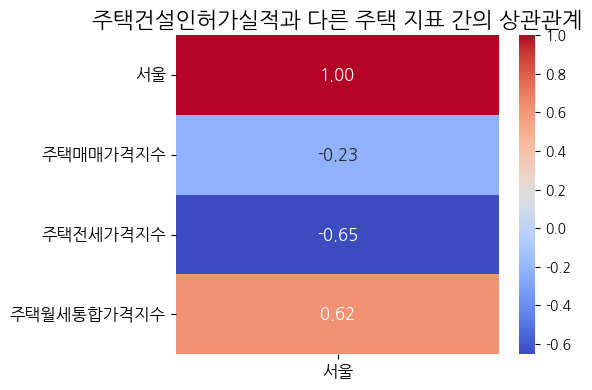

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 서울과 나머지 주택 관련 지표만 선택하여 상관 관계 계산
corr2_seoul = merged_df2[['서울', '주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']].corr()

# 서울과 나머지 지표 간의 상관 관계만 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(corr2_seoul[['서울']], annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12}, cbar=True)

# 제목 및 레이블
plt.title('주택건설인허가실적과 다른 주택 지표 간의 상관관계', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
# 날짜 기준 병합
merged_df3 = pd.merge(df3, df5, on='날짜')
merged_df3.head()

,날짜,서울,주택매매가격지수,주택전세가격지수,주택월세통합가격지수
0,2020-01-01,3417,95.1,94.9,98.4
1,2020-02-01,9068,95.2,95.0,98.5
2,2020-03-01,13685,95.3,95.1,98.5
3,2020-04-01,18025,95.3,95.2,98.5
4,2020-05-01,22149,95.2,95.2,98.5


In [ ]:
# 컬럼 이름 앞뒤 공백 제거
merged_df3.columns = merged_df3.columns.str.strip()

# 공백이 제거된 컬럼명 확인
print(merged_df3.columns)


Index(['날짜', '서울', '주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수'], dtype='object')


In [ ]:
# 상관관계 계산
corr3 = merged_df3[['서울', '주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']].corr()
corr3

,서울,주택매매가격지수,주택전세가격지수,주택월세통합가격지수
서울,1.000000,0.383477,0.409182,-0.002704
주택매매가격지수,0.383477,1.000000,0.835375,0.481687
주택전세가격지수,0.409182,0.835375,1.000000,-0.027151
주택월세통합가격지수,-0.002704,0.481687,-0.027151,1.000000


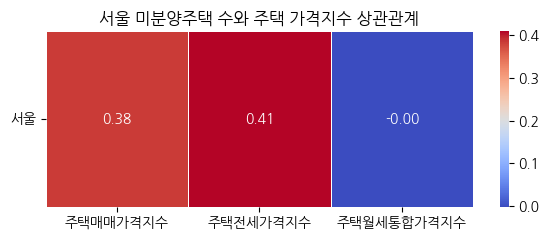

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
corr3 = merged_df3[['서울', '주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']].corr()

# 서울과 나머지 지수 간 상관관계만 추출
selected_corr = corr3.loc[['서울'], ['주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']]

# 히트맵 시각화
plt.figure(figsize=(6, 2.5))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('서울 미분양주택 수와 주택 가격지수 상관관계')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:


# 날짜 기준 병합
merged_df4 = pd.merge(df4, df5, on='날짜')
merged_df4.head()

,날짜,국내총생산실질GDP,주택매매가격지수,주택전세가격지수,주택월세통합가격지수
0,2020-01-01,-1.3,95.1,94.9,98.4
1,2020-02-01,-1.3,95.2,95.0,98.5
2,2020-03-01,-1.3,95.3,95.1,98.5
3,2020-04-01,-2.7,95.3,95.2,98.5
4,2020-05-01,-2.7,95.2,95.2,98.5


In [ ]:
# 날짜 제외하고 상관계수 계산
corr4 = merged_df4.drop(columns='날짜').corr()

# 국내총생산실질GDP와 다른 변수들 간의 상관계수만 추출
gdp_corr4 = corr4.loc[['국내총생산실질GDP'], ['주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']]
print(gdp_corr4)


            주택매매가격지수  주택전세가격지수  주택월세통합가격지수
국내총생산실질GDP  0.206036  0.139912    0.055286


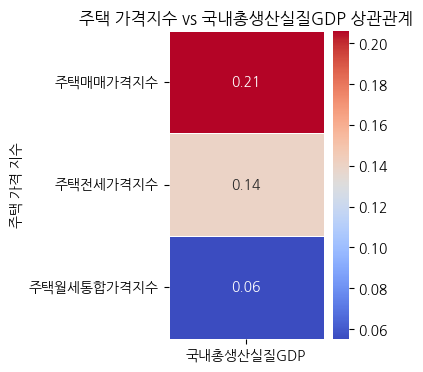

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 변수만 선택
corr2 = merged_df4[['국내총생산실질GDP', '주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']].corr()

# GDP와 나머지 지수 간 상관관계만 추출하고 전치
gdp_corr = corr2.loc[['국내총생산실질GDP'], ['주택매매가격지수', '주택전세가격지수', '주택월세통합가격지수']].T

# 히트맵 시각화
plt.figure(figsize=(2.5, 4))
sns.heatmap(gdp_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('주택 가격지수 vs 국내총생산실질GDP 상관관계')
plt.xticks(rotation=0)
plt.ylabel('주택 가격 지수')
plt.show()




# **서울시 주택 실거래가 데이터 EDA**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***엑셀 파일 15개 concat 병합***

In [ ]:
import pandas as pd
import os

folder_path = '/content/drive/MyDrive/데이터프로젝트/실거래가'


excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
print(f"엑셀 파일 개수: {len(excel_files)}개")

df_list = []

for file in excel_files[:15]:  # 만약 15개만 불러오고 싶다면 [:15] 사용
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

print(combined_df.shape)
combined_df.head()


엑셀 파일 개수: 15개
(470620, 11)


,시군구,전용면적(㎡),날짜,물건금액(만원),층,건축년도,건물용도,평수,연면적(㎡),대지면적(㎡),대지권면적(㎡)
0,서울특별시 노원구 월계동,50.18,202112,"73,600",9.0,1987.0,아파트,15.179382,NaN,NaN,NaN
1,서울특별시 중구 충무로5가,40.65,202112,"45,500",6.0,2018.0,아파트,12.296570,NaN,NaN,NaN
2,서울특별시 동대문구 용두동,14.22,202112,"18,100",18.0,2019.0,아파트,4.301531,NaN,NaN,NaN
3,서울특별시 성동구 하왕십리동,12.84,202112,"13,000",6.0,2013.0,아파트,3.884083,NaN,NaN,NaN
4,서울특별시 중랑구 묵동,102.70,202112,"105,000",4.0,1995.0,아파트,31.066610,NaN,NaN,NaN


In [ ]:
# 저장할 경로 및 파일명 설정
save_path = '/content/drive/MyDrive/데이터프로젝트/실거래가/merged_result.xlsx'

# 엑셀 파일로 저장
combined_df.to_excel(save_path, index=False)

print(f"엑셀 파일 저장 완료: {save_path}")



엑셀 파일 저장 완료: /content/drive/MyDrive/데이터프로젝트/실거래가/merged_result.xlsx


In [ ]:
# 파일 불러오기
file_path = '/content/drive/MyDrive/데이터프로젝트/merged_result.xlsx'
df = pd.read_excel(file_path)

# 기본 정보 확인
print("데이터프레임 크기:", df.shape)
print("\n컬럼별 결측치 수:")
print(df.isnull().sum())

# 수치형 컬럼만 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 이상치 탐색: IQR 기반
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

print("\n수치형 컬럼별 이상치 개수 (IQR 기준):")
for col, count in outlier_summary.items():
    print(f"{col}: {count}개")


데이터프레임 크기: (918232, 11)

컬럼별 결측치 수:
시군구              0
전용면적(㎡)      64631
날짜               0
물건금액(만원)         0
층            64631
건축년도           124
건물용도             0
평수               1
대지권면적(㎡)    530237
연면적(㎡)      853601
대지면적(㎡)     853601
dtype: int64

수치형 컬럼별 이상치 개수 (IQR 기준):
전용면적(㎡): 13179개
날짜: 0개
층: 31318개
건축년도: 3282개
평수: 51183개
대지권면적(㎡): 18449개
연면적(㎡): 4726개
대지면적(㎡): 3935개


In [ ]:
# 중앙값으로 건축년도 결측치 대체
median_year = df['건축년도'].median()
df['건축년도'] = df['건축년도'].fillna(median_year)

# 최빈값으로 층 결측치 대체
mode_floor = df['층'].mode()[0]  # 최빈값은 여러 개일 수 있으니 첫 번째 값 사용
df['층'] = df['층'].fillna(mode_floor)

# 결과 확인
print("건축년도 중앙값:", median_year)
print("층 최빈값:", mode_floor)

# 결측치 처리 후 결과 확인
print("\n결측치 수 (처리 후):")
print(df[['건축년도', '층']].isnull().sum())


건축년도 중앙값: 2003.0
층 최빈값: 2.0

결측치 수 (처리 후):
건축년도    0
층       0
dtype: int64


In [ ]:
# 저장할 경로 지정
output_file_path = '/content/drive/MyDrive/데이터프로젝트/실거래가/실거래가_역서정_코드사자.xlsx'

# 엑셀 파일로 저장
df.to_excel(output_file_path, index=False)

print(f"파일이 저장되었습니다: {output_file_path}")


파일이 저장되었습니다: /content/drive/MyDrive/데이터프로젝트/실거래가/실거래가_역서정_코드사자.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_1 = '/content/drive/MyDrive/데이터톤 프로젝트 5팀 /외부데이터 최종.csv'
file_path_2 = '/content/drive/MyDrive/데이터톤 프로젝트 5팀 /금융데이터 최종본.csv'


In [ ]:
import pandas as pd

# 첫 번째 CSV 파일 불러오기
df1 = pd.read_csv(file_path_1)

# 두 번째 CSV 파일 불러오기
df2 = pd.read_csv(file_path_2)

# 데이터프레임 확인
df1.info(), df2.info()
df1.head(), df2.head()


<ipython-input-52-b4aee496dea7>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path_1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010950 entries, 0 to 1010949
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   자치구명      1010950 non-null  object 
 1   날짜        1010950 non-null  int64  
 2   물건금액(만원)  1010950 non-null  int64  
 3   층         1010950 non-null  object 
 4   평수        1010950 non-null  int64  
 5   건축년도      1010950 non-null  float64
 6   건물용도      1010950 non-null  object 
 7   지하철역      1010950 non-null  int64  
 8   학교 수      1010950 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 69.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               60 non-null     object 
 1   건설중장비임대          60 non-null     float64
 2   건설엔지니어링          60 non-null     float64
 3   건축설계             60 non-null     flo

(              자치구명      날짜  물건금액(만원)    층  평수    건축년도 건물용도  지하철역  학교 수
 0    서울특별시 노원구 월계동  202112     73600   9   15  1987.0  아파트    13    42
 1   서울특별시 중구 충무로5가  202112     45500   6   12  2018.0  아파트    23    11
 2   서울특별시 동대문구 용두동  202112     18100  18    4  2019.0  아파트     6    21
 3  서울특별시 성동구 하왕십리동  202112     13000   6    4  2013.0  아파트    14    21
 4     서울특별시 중랑구 묵동  202112    105000   4   31  1995.0  아파트     8    24,
            날짜  건설중장비임대  건설엔지니어링   건축설계  선행종합지수  동행종합지수  유형별 주택매매가격지수  \
 0  2020-01-01    100.0    99.95  99.54    98.3   101.4          90.6   
 1  2020-02-01    100.0    99.95  99.55    98.6   100.9          88.6   
 2  2020-03-01    100.0    99.82  99.24    98.5    99.9          92.4   
 3  2020-04-01    100.0    99.68  98.90    98.5    99.0          89.2   
 4  2020-05-01    100.0    99.68  98.91    98.5    98.2          95.0   
 
    유형별 주택전세가격지수  유형별 주택월세통합가격지수 주택건설인허가실적(서울)  미분양주택현황(서울)  기준금리   소비자물가  \
 0          92.9            97.9         3,417    

In [ ]:
# df1의 결측치 확인
print("df1 결측치 개수:")
print(df1.isnull().sum())  # 또는 df1.isna().sum()

# df2의 결측치 확인
print("\ndf2 결측치 개수:")
print(df2.isnull().sum())  # 또는 df2.isna().sum()


df1 결측치 개수:
자치구명        0
날짜          0
물건금액(만원)    0
층           0
평수          0
건축년도        0
건물용도        0
지하철역        0
학교 수        0
dtype: int64

df2 결측치 개수:
날짜                 0
건설중장비임대            0
건설엔지니어링            0
건축설계               0
선행종합지수             0
동행종합지수             0
유형별 주택매매가격지수       0
유형별 주택전세가격지수       0
유형별 주택월세통합가격지수     0
주택건설인허가실적(서울)      0
미분양주택현황(서울)        0
기준금리               0
소비자물가              0
실질 GDP             0
주택담보대출(증감-전월대비)    0
dtype: int64


In [ ]:
import pandas as pd

# 첫 번째 CSV 파일 불러오기
df1 = pd.read_csv(file_path_1)

# 두 번째 CSV 파일 불러오기
df2 = pd.read_csv(file_path_2)

# 날짜 컬럼의 형식 맞추기 (df1의 날짜는 정수형, df2는 문자열 형식일 수 있음)
df1['날짜'] = df1['날짜'].astype(str)
df2['날짜'] = pd.to_datetime(df2['날짜']).dt.strftime('%Y%m')  # yyyyMM 형식으로 맞추기

# 날짜 기준으로 두 데이터프레임 병합
merged_df = pd.merge(df1, df2, on='날짜', how='inner')  # 'inner'는 공통된 날짜 기준으로 병합

# 병합된 결과 확인
print(merged_df.info())
print(merged_df.head())

# 병합된 데이터프레임을 CSV로 저장 (내 드라이브에 저장)
merged_file_path = '/content/drive/MyDrive/병합된_데이터.csv'
merged_df.to_csv(merged_file_path, index=False, encoding='utf-8-sig')

print("✅ 병합된 파일 저장 완료:", merged_file_path)


<ipython-input-55-f8e930888aa1>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path_1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010950 entries, 0 to 1010949
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   자치구명             1010950 non-null  object 
 1   날짜               1010950 non-null  object 
 2   물건금액(만원)         1010950 non-null  int64  
 3   층                1010950 non-null  object 
 4   평수               1010950 non-null  int64  
 5   건축년도             1010950 non-null  float64
 6   건물용도             1010950 non-null  object 
 7   지하철역             1010950 non-null  int64  
 8   학교 수             1010950 non-null  int64  
 9   건설중장비임대          1010950 non-null  float64
 10  건설엔지니어링          1010950 non-null  float64
 11  건축설계             1010950 non-null  float64
 12  선행종합지수           1010950 non-null  float64
 13  동행종합지수           1010950 non-null  float64
 14  유형별 주택매매가격지수     1010950 non-null  float64
 15  유형별 주택전세가격지수     1010950 non-null  float64
 16  유형별 주택월세통합가격지수   1

In [ ]:
# 결측치 확인
print("결측치 개수:")
print(merged_df.isnull().sum())  # 각 열에 대해 결측치 개수 출력


결측치 개수:
자치구명               0
날짜                 0
물건금액(만원)           0
층                  0
평수                 0
건축년도               0
건물용도               0
지하철역               0
학교 수               0
건설중장비임대            0
건설엔지니어링            0
건축설계               0
선행종합지수             0
동행종합지수             0
유형별 주택매매가격지수       0
유형별 주택전세가격지수       0
유형별 주택월세통합가격지수     0
주택건설인허가실적(서울)      0
미분양주택현황(서울)        0
기준금리               0
소비자물가              0
실질 GDP             0
주택담보대출(증감-전월대비)    0
dtype: int64


In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/데이터톤 프로젝트 5팀 /금융데이터 최종본.csv')

# 데이터 확인
print(df.head())


           날짜  건설중장비임대  건설엔지니어링   건축설계  선행종합지수  동행종합지수  유형별 주택매매가격지수  \
0  2020-01-01    100.0    99.95  99.54    98.3   101.4          90.6   
1  2020-02-01    100.0    99.95  99.55    98.6   100.9          88.6   
2  2020-03-01    100.0    99.82  99.24    98.5    99.9          92.4   
3  2020-04-01    100.0    99.68  98.90    98.5    99.0          89.2   
4  2020-05-01    100.0    99.68  98.91    98.5    98.2          95.0   

   유형별 주택전세가격지수  유형별 주택월세통합가격지수 주택건설인허가실적(서울)  미분양주택현황(서울)  기준금리   소비자물가  \
0          92.9            97.9         3,417          131  1.25  100.09   
1          91.9            97.8         5,651          112  1.25  100.16   
2          93.8            98.1         4,617           91  0.75   99.94   
3          91.5            97.4         4,340           78  0.75   99.50   
4          96.1            98.9         4,124           70  0.50   99.44   

   실질 GDP  주택담보대출(증감-전월대비)  
0    -1.3          946.200  
1    -1.3         1997.950  
2    -1.3         2399.

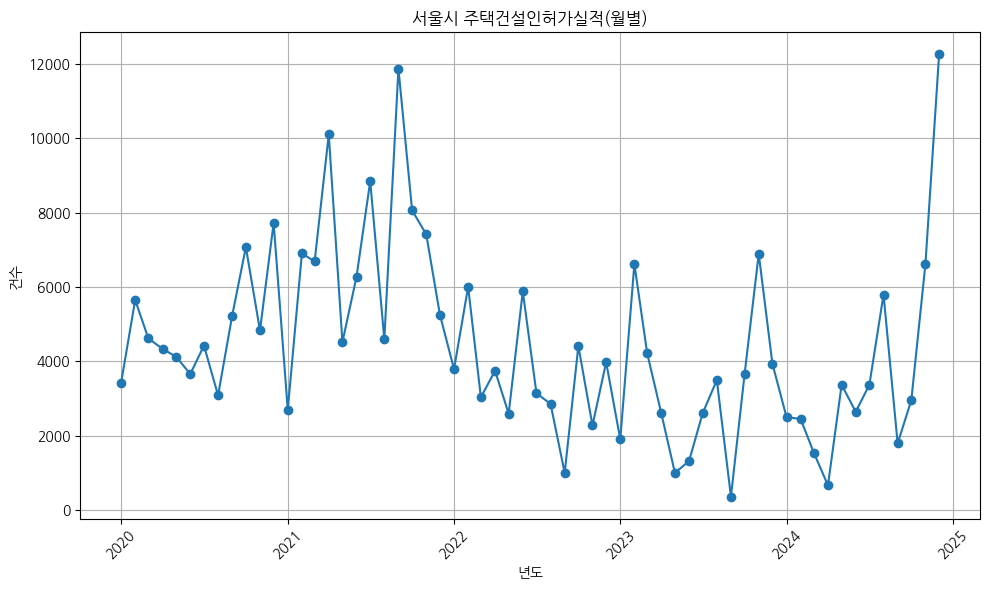

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 날짜 컬럼이 문자열이면 datetime으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 주택건설인허가실적(서울) 변환 필요 없음 (이미 숫자형)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df['날짜'], df['주택건설인허가실적(서울)'], marker='o')
plt.title('서울시 주택건설인허가실적(월별)')
plt.xlabel('년도')
plt.ylabel('건수')

# x축을 년도 단위로 설정
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # 1년마다 눈금
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 연도만 출력
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


## **데이터 최종본 건물 용도 컬럼 4가지로 통일**

In [ ]:
import pandas as pd

# CSV 파일 불러오기 (euc-kr 인코딩 사용)
df = pd.read_csv('/content/drive/MyDrive/데이터톤 프로젝트 5팀 /데이터 최종본.csv', encoding='euc-kr')

# 데이터 확인
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/데이터톤 프로젝트 5팀 /데이터 최종본.csv'

In [ ]:
# 건물용도 통일 함수
def unify_building_type(row):
    if row in ['연립', '다세대']:
        return '연립다세대'
    elif row in ['단독', '다가구']:
        return '단독다가구'
    else:
        return row  # 그 외의 값은 그대로

# '건물용도' 컬럼의 값을 통일
df['건물용도'] = df['건물용도'].apply(unify_building_type)

# 결과 확인
print(df)


                    자치구명      날짜  물건금액(만원)   층  평수  건축년도   건물용도  지하철역  학교 수  \
0          서울특별시 노원구 월계동  202112     73600   9  15  1987    아파트    13    42   
1         서울특별시 중구 충무로5가  202112     45500   6  12  2018    아파트    23    11   
2         서울특별시 동대문구 용두동  202112     18100  18   4  2019    아파트     6    21   
3        서울특별시 성동구 하왕십리동  202112     13000   6   4  2013    아파트    14    21   
4           서울특별시 중랑구 묵동  202112    105000   4  31  1995    아파트     8    24   
...                  ...     ...       ...  ..  ..   ...    ...   ...   ...   
1010945              구로구  202207      9190   1  16  1981  연립다세대     7    26   
1010946              구로구  202207      9190   1  16  1981  연립다세대     7    26   
1010947              구로구  202207      9740   2  16  1981  연립다세대     7    26   
1010948              마포구  202107    195000   2  48  1988  단독다가구    16    22   
1010949              강북구  202102    164000   2  89  1994  단독다가구     3    14   

         건설중장비임대  ...  유형별 주택매매가격지수  유형별 주택전세가격지수  

In [ ]:
# 고유한 건물용도 값 확인
unique_building_types = df['건물용도'].unique()

# 고유한 값의 개수 및 값 출력
print(f"건물용도 컬럼의 고유값 개수: {len(unique_building_types)}")
print("고유한 건물용도 값들:", unique_building_types)

건물용도 컬럼의 고유값 개수: 4
고유한 건물용도 값들: ['아파트' '연립다세대' '단독다가구' '오피스텔']


In [ ]:
# CSV 파일로 저장 (파일 경로 설정)
file_path = '/content/건물용도_예시.csv'
df.to_csv(file_path, index=False, encoding='euc-kr')  # 인덱스를 저장하지 않도록 설정하고 euc-kr 인코딩 사용

print(f"CSV 파일이 저장되었습니다: {file_path}")

CSV 파일이 저장되었습니다: /content/건물용도_예시.csv


In [ ]:
# CSV 파일 불러오기 (euc-kr 인코딩 사용)
df = pd.read_csv('/content/drive/MyDrive/데이터톤 프로젝트 5팀 /데이터 최최종본.csv', encoding='euc-kr')

# 데이터 확인
print(df.head())

              자치구명      날짜  물건금액(만원)   층  평수  건축년도 건물용도  지하철역  학교 수  건설중장비임대  \
0    서울특별시 노원구 월계동  202112     73600   9  15  1987  아파트    13    42   107.74   
1   서울특별시 중구 충무로5가  202112     45500   6  12  2018  아파트    23    11   107.74   
2   서울특별시 동대문구 용두동  202112     18100  18   4  2019  아파트     6    21   107.74   
3  서울특별시 성동구 하왕십리동  202112     13000   6   4  2013  아파트    14    21   107.74   
4     서울특별시 중랑구 묵동  202112    105000   4  31  1995  아파트     8    24   107.74   

   ...  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0  ...          90.4          93.6            98.3          5,261   
1  ...          90.4          93.6            98.3          5,261   
2  ...          90.4          93.6            98.3          5,261   
3  ...          90.4          93.6            98.3          5,261   
4  ...          90.4          93.6            98.3          5,261   

   미분양주택현황(서울)  기준금리   소비자물가 실질 GDP  주택담보대출(증감-전월대비)  물건금액(억)  
0           54   1.0  104.04    1.6     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010950 entries, 0 to 1010949
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   자치구명             1010950 non-null  object 
 1   날짜               1010950 non-null  int64  
 2   물건금액(만원)         1010950 non-null  int64  
 3   층                1010950 non-null  int64  
 4   평수               1010950 non-null  int64  
 5   건축년도             1010950 non-null  int64  
 6   건물용도             1010950 non-null  object 
 7   지하철역             1010950 non-null  int64  
 8   학교 수             1010950 non-null  int64  
 9   건설중장비임대          1010950 non-null  float64
 10  건설엔지니어링          1010950 non-null  float64
 11  건축설계             1010950 non-null  float64
 12  선행종합지수           1010950 non-null  float64
 13  동행종합지수           1010950 non-null  float64
 14  유형별 주택매매가격지수     1010950 non-null  float64
 15  유형별 주택전세가격지수     1010950 non-null  float64
 16  유형별 주택월세통합가격지수   1

In [ ]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/데이터프로젝트/경제활동별 GDP 및 GNI(계절조정, 실질, 분기)_29173632.xlsx')

# 데이터 확인
print(df1.head(25))

         날짜  실질 국내총생산
0   2020/Q1  517669.6
1   2020/Q2  503484.6
2   2020/Q3  514605.8
3   2020/Q4  522706.6
4   2021/Q1  530771.1
5   2021/Q2  537903.8
6   2021/Q3  538085.7
7   2021/Q4  546662.2
8   2022/Q1  549303.7
9   2022/Q2  553684.8
10  2022/Q3  555841.5
11  2022/Q4  553328.9
12  2023/Q1  555761.1
13  2023/Q2  558825.9
14  2023/Q3  563035.7
15  2023/Q4  565597.6
16  2024/Q1  572951.0
17  2024/Q2  571646.7
18  2024/Q3  572216.0
19  2024/Q4  572594.9
20  2019/Q4  524415.7


In [ ]:
import pandas as pd

# 원본 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/데이터프로젝트/경제활동별 GDP 및 GNI(계절조정, 실질, 분기)_29173632.xlsx')

# 컬럼명 정리
df.columns = ['분기', 'GDP']

# 분기 → 시작 월 딕셔너리
quarter_month_map = {
    'Q1': ['01', '02', '03'],
    'Q2': ['04', '05', '06'],
    'Q3': ['07', '08', '09'],
    'Q4': ['10', '11', '12']
}

# 분기 데이터 → 월별로 확장
monthly_data = []

for _, row in df.iterrows():
    year, quarter = row['분기'].split('/')
    months = quarter_month_map[quarter]
    for month in months:
        monthly_data.append({
            '연월': f'{year}-{month}',
            'GDP': row['GDP'] / 3  # 분기값을 3개월로 나누어 분배
        })

# 월별 DataFrame 생성
monthly_df = pd.DataFrame(monthly_data)

# 확인
print(monthly_df.head(12))


         연월            GDP
0   2020-01  172556.533333
1   2020-02  172556.533333
2   2020-03  172556.533333
3   2020-04  167828.200000
4   2020-05  167828.200000
5   2020-06  167828.200000
6   2020-07  171535.266667
7   2020-08  171535.266667
8   2020-09  171535.266667
9   2020-10  174235.533333
10  2020-11  174235.533333
11  2020-12  174235.533333


# **데이터병합**

In [ ]:
import pandas as pd

# 파일 경로
file1 = '/content/drive/MyDrive/데이터프로젝트/금융데이터 최종본 (1).csv'
file2 = '/content/drive/MyDrive/데이터프로젝트/매매 병합.csv'

# 인코딩에 맞춰 CSV 파일 읽기
df1 = pd.read_csv(file1, encoding='utf-8-sig')  # file1은 UTF-8-SIG
df2 = pd.read_csv(file2, encoding='euc-kr')     # file2는 EUC-KR

In [ ]:

df1.info()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               60 non-null     object 
 1   건설중장비임대          60 non-null     float64
 2   건설엔지니어링          60 non-null     float64
 3   건축설계             60 non-null     float64
 4   선행종합지수           60 non-null     float64
 5   동행종합지수           60 non-null     float64
 6   유형별 주택매매가격지수     60 non-null     float64
 7   유형별 주택전세가격지수     60 non-null     float64
 8   유형별 주택월세통합가격지수   60 non-null     float64
 9   주택건설인허가실적(서울)    60 non-null     object 
 10  미분양주택현황(서울)      60 non-null     int64  
 11  기준금리             60 non-null     float64
 12  소비자물가            60 non-null     float64
 13  실질 GDP           60 non-null     float64
 14  주택담보대출(증감-전월대비)  60 non-null     float64
dtypes: float64(12), int64(1), object(2)
memory usage: 7.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54

In [ ]:
df1.head()

,날짜,건설중장비임대,건설엔지니어링,건축설계,선행종합지수,동행종합지수,유형별 주택매매가격지수,유형별 주택전세가격지수,유형별 주택월세통합가격지수,주택건설인허가실적(서울),미분양주택현황(서울),기준금리,소비자물가,실질 GDP,주택담보대출(증감-전월대비)
0,2020-01-01,100.0,99.95,99.54,98.3,101.4,90.6,92.9,97.9,"3,417",131,1.25,100.09,-1.3,946.200
1,2020-02-01,100.0,99.95,99.55,98.6,100.9,88.6,91.9,97.8,"5,651",112,1.25,100.16,-1.3,1997.950
2,2020-03-01,100.0,99.82,99.24,98.5,99.9,92.4,93.8,98.1,"4,617",91,0.75,99.94,-1.3,2399.775
3,2020-04-01,100.0,99.68,98.90,98.5,99.0,89.2,91.5,97.4,"4,340",78,0.75,99.50,-2.7,2493.500
4,2020-05-01,100.0,99.68,98.91,98.5,98.2,95.0,96.1,98.9,"4,124",70,0.50,99.44,-2.7,1574.225


In [ ]:
df1.head()


,날짜,건설중장비임대,건설엔지니어링,건축설계,선행종합지수,동행종합지수,유형별 주택매매가격지수,유형별 주택전세가격지수,유형별 주택월세통합가격지수,주택건설인허가실적(서울),미분양주택현황(서울),기준금리,소비자물가,실질 GDP,주택담보대출(증감-전월대비)
0,2020-01-01,100.0,99.95,99.54,98.3,101.4,90.6,92.9,97.9,"3,417",131,1.25,100.09,-1.3,946.200
1,2020-02-01,100.0,99.95,99.55,98.6,100.9,88.6,91.9,97.8,"5,651",112,1.25,100.16,-1.3,1997.950
2,2020-03-01,100.0,99.82,99.24,98.5,99.9,92.4,93.8,98.1,"4,617",91,0.75,99.94,-1.3,2399.775
3,2020-04-01,100.0,99.68,98.90,98.5,99.0,89.2,91.5,97.4,"4,340",78,0.75,99.50,-2.7,2493.500
4,2020-05-01,100.0,99.68,98.91,98.5,98.2,95.0,96.1,98.9,"4,124",70,0.50,99.44,-2.7,1574.225


In [ ]:
import pandas as pd

# 파일 경로
file1 = '/content/drive/MyDrive/데이터프로젝트/금융데이터 최종본 (1).csv'
file2 = '/content/drive/MyDrive/데이터프로젝트/매매 병합.csv'

# 인코딩에 맞춰 CSV 파일 읽기
df1 = pd.read_csv(file1, encoding='utf-8-sig')  # file1은 UTF-8-SIG
df2 = pd.read_csv(file2, encoding='euc-kr')     # file2는 EUC-KR

# df1: 날짜 datetime 변환
df1['날짜'] = pd.to_datetime(df1['날짜'])

# df2: 날짜 열이 'yyyymm' 형식이라면 → 'yyyymm01'로 변환 후 datetime 처리
df2['날짜'] = pd.to_datetime(df2['날짜'].astype(str) + '01', format='%Y%m%d')

# 병합 (df2 기준으로 df1을 병합)
merged_df = pd.merge(df2, df1, on='날짜', how='left')

# 결과 확인
print(merged_df.head())

# 추가적으로, NaN이 포함된 행을 확인하고 싶다면 아래 코드 사용
nan_rows = merged_df[merged_df.isna().any(axis=1)]
print(f"NaN이 포함된 행 개수: {nan_rows.shape[0]}")



          날짜   자치구 물건금액(만원)  건축년도 건물용도 거래유형  평수     층  건설중장비임대  건설엔지니어링  ...  \
0 2024-12-01  동대문구   66,700  2000  아파트   매매  18  12.0    133.6   130.99  ...   
1 2024-12-01  동대문구   91,500  2001  아파트   매매  26  13.0    133.6   130.99  ...   
2 2024-12-01  동대문구   96,500  2003  아파트   매매  26  18.0    133.6   130.99  ...   
3 2024-12-01   광진구  132,000  1996  아파트   매매  26  20.0    133.6   130.99  ...   
4 2024-12-01   종로구  233,000  2017  아파트   매매  26   4.0    133.6   130.99  ...   

   동행종합지수  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0   112.4          93.7          98.2            99.0         12,259   
1   112.4          93.7          98.2            99.0         12,259   
2   112.4          93.7          98.2            99.0         12,259   
3   112.4          93.7          98.2            99.0         12,259   
4   112.4          93.7          98.2            99.0         12,259   

   미분양주택현황(서울) 기준금리   소비자물가  실질 GDP  주택담보대출(증감-전월대비)  
0          957  3.0  114.91    

In [ ]:
# 결과를 CSV 파일로 저장
output_file = '/content/drive/MyDrive/데이터프로젝트/merged_output.csv'
merged_df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"병합된 파일이 {output_file}에 저장되었습니다.")

병합된 파일이 /content/drive/MyDrive/데이터프로젝트/merged_output.csv에 저장되었습니다.


# **2030 월 평균임금**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 인코딩을 cp949로 지정해서 읽기
df = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/근로자의_평균임금_성_사업체규모_연령별__20250501132413.csv', encoding='cp949')

# 데이터 미리보기
df.head()


,날짜,월임금총액 (원),월임금총액 (원).1,월임금총액 (원).2,월임금총액 (원).3
0,NaN,20~24세,25~29세,30~34세,35~39세
1,2020.0,2249000,2871000,3464000,4000000
2,2021.0,2274000,2939000,3540000,4145000
3,2022.0,2405000,3118000,3732000,4368000
4,2023.0,2635000,3308000,3941000,4683000


In [ ]:
import pandas as pd

# CSV 불러오기 (cp949 인코딩)
df = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/근로자의_평균임금_성_사업체규모_연령별__20250501132413.csv', encoding='cp949')

# 첫 번째 행(0번 인덱스)을 헤더로 사용
df.columns = df.iloc[0]
df = df.drop(index=0)

# 날짜 컬럼 이름 정리
df = df.rename(columns={df.columns[0]: "연도"})

# 연도 컬럼 float → int로 변환
df["연도"] = df["연도"].astype(float).astype(int)

# 사용할 연령대 컬럼만 선택
age_cols = ["20~24세", "25~29세", "30~34세", "35~39세"]
df_2030 = df[["연도"] + age_cols].copy()

# 문자열을 숫자형으로 변환
for col in age_cols:
    df_2030[col] = pd.to_numeric(df_2030[col], errors='coerce')

# 2030 평균 임금 계산 (행 기준 평균)
df_2030["2030세대 평균임금"] = df_2030[age_cols].mean(axis=1)

# 결과 확인
result = df_2030[["연도", "2030세대 평균임금"]]
print(result)



0    연도  2030세대 평균임금
1  2020    3146000.0
2  2021    3224500.0
3  2022    3405750.0
4  2023    3641750.0


In [ ]:
# 결과 CSV로 저장
result.to_csv('/content/2030세대_월평균임금.csv', index=False, encoding='utf-8-sig')

# **주택 전세데이터와 금융데이터,학교수 등등 총병합**

In [ ]:
import pandas as pd

# 인코딩을 cp949 또는 euc-kr로 설정
df1 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/전세 데이터.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/금융데이터 최종본 (1).csv')

# 확인
print(df1.head())
print(df2.head())



  거래유형      날짜  보증금(만원)  월세금(만원)   층  건축년도 건물용도  평수    구
0   전세  202412  105,000        0   6  1998  아파트  35  용산구
1   전세  202412   60,900        0  18  1999  아파트  26  성동구
2   전세  202412   63,000        0   2  2017  아파트  22   중구
3   전세  202412   62,000        0  15  2005  아파트  26  용산구
4   전세  202412   42,000        0   2  1999  아파트  15  종로구
           날짜  건설중장비임대  건설엔지니어링   건축설계  선행종합지수  동행종합지수  유형별 주택매매가격지수  \
0  2020-01-01    100.0    99.95  99.54    98.3   101.4          90.6   
1  2020-02-01    100.0    99.95  99.55    98.6   100.9          88.6   
2  2020-03-01    100.0    99.82  99.24    98.5    99.9          92.4   
3  2020-04-01    100.0    99.68  98.90    98.5    99.0          89.2   
4  2020-05-01    100.0    99.68  98.91    98.5    98.2          95.0   

   유형별 주택전세가격지수  유형별 주택월세통합가격지수 주택건설인허가실적(서울)  미분양주택현황(서울)  기준금리   소비자물가  \
0          92.9            97.9         3,417          131  1.25  100.09   
1          91.9            97.8         5,651          112  1.25  100.16 

In [ ]:
import pandas as pd

# 파일 불러오기 (cp949 인코딩)
df1 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/전세 데이터.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/금융데이터 최종본 (1).csv')

# ✅ df1: 날짜 'yyyymm' → 'yyyy-mm'로 변환
df1['날짜'] = df1['날짜'].astype(str).str[:4] + '-' + df1['날짜'].astype(str).str[4:6]

# ✅ df2: 날짜 'yyyy-mm-dd' → 'yyyy-mm'로 변환
df2['날짜'] = pd.to_datetime(df2['날짜']).dt.to_period('M').astype(str)

# ✅ 날짜 기준 병합
merged_df = pd.merge(df1, df2, on='날짜', how='inner')

# ✅ 저장 (선택)
merged_df.to_csv('/content/drive/MyDrive/데이터프로젝트/병합결과.csv', index=False)

# 미리보기
print(merged_df.head())


  거래유형       날짜  보증금(만원)  월세금(만원)   층  건축년도 건물용도  평수    구  건설중장비임대  ...  \
0   전세  2024-12  105,000        0   6  1998  아파트  35  용산구    133.6  ...   
1   전세  2024-12   60,900        0  18  1999  아파트  26  성동구    133.6  ...   
2   전세  2024-12   63,000        0   2  2017  아파트  22   중구    133.6  ...   
3   전세  2024-12   62,000        0  15  2005  아파트  26  용산구    133.6  ...   
4   전세  2024-12   42,000        0   2  1999  아파트  15  종로구    133.6  ...   

   동행종합지수  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0   112.4          93.7          98.2            99.0         12,259   
1   112.4          93.7          98.2            99.0         12,259   
2   112.4          93.7          98.2            99.0         12,259   
3   112.4          93.7          98.2            99.0         12,259   
4   112.4          93.7          98.2            99.0         12,259   

   미분양주택현황(서울)  기준금리   소비자물가  실질 GDP  주택담보대출(증감-전월대비)  
0          957   3.0  114.91     0.1          1934.85  
1   

In [ ]:
import pandas as pd

# 인코딩을 cp949 또는 euc-kr로 설정
df1 = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/전세 금융병합.csv', encoding='utf-8')
df2 = pd.read_csv('/content/drive/MyDrive/데이터톤 프로젝트 5팀 /병두/서울특별시 자치구별 지하철역,학교 수.csv',encoding='cp949')

# 확인
print(df1.head())
print(df2.head())


  거래유형       날짜  보증금(만원)  월세금(만원)   층  건축년도 건물용도  평수    구  건설중장비임대  ...  \
0   전세  2024-12  105,000        0   6  1998  아파트  35  용산구    133.6  ...   
1   전세  2024-12   60,900        0  18  1999  아파트  26  성동구    133.6  ...   
2   전세  2024-12   63,000        0   2  2017  아파트  22   중구    133.6  ...   
3   전세  2024-12   62,000        0  15  2005  아파트  26  용산구    133.6  ...   
4   전세  2024-12   42,000        0   2  1999  아파트  15  종로구    133.6  ...   

   동행종합지수  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0   112.4          93.7          98.2            99.0         12,259   
1   112.4          93.7          98.2            99.0         12,259   
2   112.4          93.7          98.2            99.0         12,259   
3   112.4          93.7          98.2            99.0         12,259   
4   112.4          93.7          98.2            99.0         12,259   

   미분양주택현황(서울)  기준금리   소비자물가  실질 GDP  주택담보대출(증감-전월대비)  
0          957   3.0  114.91     0.1          1934.85  
1   

In [ ]:
df1.rename(columns={'구': '자치구'}, inplace=True)
df1.head()

,거래유형,날짜,보증금(만원),월세금(만원),층,건축년도,건물용도,평수,자치구,건설중장비임대,...,동행종합지수,유형별 주택매매가격지수,유형별 주택전세가격지수,유형별 주택월세통합가격지수,주택건설인허가실적(서울),미분양주택현황(서울),기준금리,소비자물가,실질 GDP,주택담보대출(증감-전월대비)
0,전세,2024-12,"105,000",0,6,1998,아파트,35,용산구,133.6,...,112.4,93.7,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85
1,전세,2024-12,"60,900",0,18,1999,아파트,26,성동구,133.6,...,112.4,93.7,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85
2,전세,2024-12,"63,000",0,2,2017,아파트,22,중구,133.6,...,112.4,93.7,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85
3,전세,2024-12,"62,000",0,15,2005,아파트,26,용산구,133.6,...,112.4,93.7,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85
4,전세,2024-12,"42,000",0,2,1999,아파트,15,종로구,133.6,...,112.4,93.7,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85


In [ ]:
# '구' 컬럼명을 '자치구'로 변경 (이미 했다면 생략 가능)
df1.rename(columns={'구': '자치구'}, inplace=True)

# 자치구 기준 병합 (inner: 공통된 자치구만, left: df1 기준 유지 등 선택 가능)
merged_df = pd.merge(df1, df2, on='자치구', how='left')

# 결과 확인
print(merged_df.head())

  거래유형       날짜  보증금(만원)  월세금(만원)   층  건축년도 건물용도  평수  자치구  건설중장비임대  ...  \
0   전세  2024-12  105,000        0   6  1998  아파트  35  용산구    133.6  ...   
1   전세  2024-12   60,900        0  18  1999  아파트  26  성동구    133.6  ...   
2   전세  2024-12   63,000        0   2  2017  아파트  22   중구    133.6  ...   
3   전세  2024-12   62,000        0  15  2005  아파트  26  용산구    133.6  ...   
4   전세  2024-12   42,000        0   2  1999  아파트  15  종로구    133.6  ...   

   유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  미분양주택현황(서울)  기준금리   소비자물가  \
0          98.2            99.0         12,259          957   3.0  114.91   
1          98.2            99.0         12,259          957   3.0  114.91   
2          98.2            99.0         12,259          957   3.0  114.91   
3          98.2            99.0         12,259          957   3.0  114.91   
4          98.2            99.0         12,259          957   3.0  114.91   

   실질 GDP 주택담보대출(증감-전월대비)  역개수  학교 수   
0     0.1         1934.85   10     15  
1     

In [ ]:
# 병합한 데이터 저장
merged_df.to_csv('/content/drive/MyDrive/병합된_전세_데이터.csv', index=False, encoding='utf-8-sig')


In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/데이터프로젝트/전세 데이터 최종본.csv')


df.head()

,거래유형,날짜,보증금(만원),월세금(만원),층,건축년도,건물용도,평수,자치구,건설중장비임대,...,유형별 주택전세가격지수,유형별 주택월세통합가격지수,주택건설인허가실적(서울),미분양주택현황(서울),기준금리,소비자물가,실질 GDP,주택담보대출(증감-전월대비),역개수,학교 수
0,전세,2024-12,"105,000",0,6,1998,아파트,35,용산구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,10,15
1,전세,2024-12,"60,900",0,18,1999,아파트,26,성동구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,14,21
2,전세,2024-12,"63,000",0,2,2017,아파트,22,중구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,23,12
3,전세,2024-12,"62,000",0,15,2005,아파트,26,용산구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,10,15
4,전세,2024-12,"42,000",0,2,1999,아파트,15,종로구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,15,12


In [ ]:
filtered_df = df[df['자치구'].isin(['강서구', '강남구', '송파구', '관악구'])]
filtered_df.head()


,거래유형,날짜,보증금(만원),월세금(만원),층,건축년도,건물용도,평수,자치구,건설중장비임대,...,유형별 주택전세가격지수,유형별 주택월세통합가격지수,주택건설인허가실적(서울),미분양주택현황(서울),기준금리,소비자물가,실질 GDP,주택담보대출(증감-전월대비),역개수,학교 수
61,전세,2024-12,"95,000",0,2,1993,아파트,26,강남구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34
62,전세,2024-12,"81,900",0,4,1997,아파트,26,강남구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34
63,전세,2024-12,"100,000",0,6,2023,아파트,26,강남구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34
64,전세,2024-12,"97,000",0,8,1983,아파트,26,강남구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34
65,전세,2024-12,"125,000",0,9,1985,아파트,26,강남구,133.6,...,98.2,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34


In [ ]:
filtered_df = filtered_df.reset_index(drop=True)


In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/전세데이터_필터링.csv', index=False)


# **전세 데이터 머신러닝 모델**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #통계라이브러리 | 머신러닝 사이킥런
import statsmodels.api as sm #통계라이브러리
from statsmodels.formula.api import ols #통계라이브러리
from statsmodels.stats.multicomp import pairwise_tukeyhsd #통계라이브러리
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
#시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

# 인코딩을 'cp949'로 설정하여 파일 읽기
df = pd.read_csv("/content/drive/MyDrive/데이터프로젝트/4개구전세데이터.csv", encoding='cp949')




In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97705 entries, 0 to 97704
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   거래유형             97705 non-null  object 
 1   날짜               97705 non-null  object 
 2   보증금(만원)          97705 non-null  object 
 3   월세금(만원)          97705 non-null  int64  
 4   층                97705 non-null  int64  
 5   건축년도             97705 non-null  int64  
 6   건물용도             97705 non-null  object 
 7   평수               97705 non-null  int64  
 8   자치구              97705 non-null  object 
 9   건설중장비임대          97705 non-null  float64
 10  건설엔지니어링          97705 non-null  float64
 11  건축설계             97705 non-null  float64
 12  선행종합지수           97705 non-null  float64
 13  동행종합지수           97705 non-null  float64
 14  유형별 주택매매가격지수     97705 non-null  float64
 15  유형별 주택전세가격지수     97705 non-null  float64
 16  유형별 주택월세통합가격지수   97705 non-null  float64
 17  주택건설인허가실적(서울

In [ ]:
df.head()

,거래유형,날짜,보증금(만원),월세금(만원),층,건축년도,건물용도,평수,자치구,건설중장비임대,...,유형별 주택월세통합가격지수,주택건설인허가실적(서울),미분양주택현황(서울),기준금리,소비자물가,실질 GDP,주택담보대출(증감-전월대비),역개수,학교 수,전세금(억)
0,전세,2024-12-01,"95,000",0,2,1993,아파트,26,강남구,133.6,...,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34,9.50
1,전세,2024-12-01,"81,900",0,4,1997,아파트,26,강남구,133.6,...,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34,8.19
2,전세,2024-12-01,"100,000",0,6,2023,아파트,26,강남구,133.6,...,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34,10.00
3,전세,2024-12-01,"97,000",0,8,1983,아파트,26,강남구,133.6,...,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34,9.70
4,전세,2024-12-01,"125,000",0,9,1985,아파트,26,강남구,133.6,...,99.0,"12,259",957,3.0,114.91,0.1,1934.85,21,34,12.50


## **데이터 전처리**

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --------- 데이터 전처리 ---------

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# 숫자형 변환 (쉼표 제거)
num_cols = [
    '전세금(억)', '역개수', '학교 수', '평수', '층', '건축년도',
    '미분양주택현황(서울)', '주택담보대출(증감-전월대비)',
    '유형별 주택전세가격지수', '선행종합지수', '동행종합지수', '건축설계'
]
for col in num_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# 날짜형 변환
df['날짜'] = pd.to_datetime(df['날짜'])
df['YM'] = df['날짜'].dt.to_period('M').astype(str)

# 지하 여부 및 층수 변환
df['is_basement'] = df['층'].apply(lambda x: 1 if x < 0 else 0)
df['abs_층'] = df['층'].abs()

# 건축연수 생성
df['건축연수'] = 2025 - df['건축년도']

# 로그 변환 변수 생성
df['log전세금'] = np.log1p(df['전세금(억)'])
df['log평수'] = np.log1p(df['평수'])
df['log_건축연수'] = np.log1p(df['건축연수'])
df['log_abs층'] = np.log1p(df['abs_층'])

# --------- 시계열 변수 추가 ---------

# 자치구 및 YM별 월평균 전세금
monthly_avg = df.groupby(['자치구', 'YM'])['전세금(억)'].mean().reset_index().rename(columns={'전세금(억)': '월평균전세금'})
df = df.merge(monthly_avg, on=['자치구', 'YM'], how='left')

# 1개월 전 Lag 및 3개월 이동평균 생성
df['lag1_월평균'] = df.groupby('자치구')['월평균전세금'].shift(1)
df['ma3_월평균'] = df.groupby('자치구')['월평균전세금'].transform(lambda x: x.rolling(3).mean())

# 로그 변환
df['log_lag1월평균'] = np.log1p(df['lag1_월평균'])
df['log_ma3월평균'] = np.log1p(df['ma3_월평균'])

# 범주형 변수 인코딩
df = pd.get_dummies(df, columns=['자치구', '건물용도'])

# --------- 최종 특성(features) ---------

features = [
    'log평수', 'log_abs층', 'log_건축연수', '역개수', '학교 수', 'is_basement',
    '미분양주택현황(서울)', '주택담보대출(증감-전월대비)',
    '유형별 주택전세가격지수', '선행종합지수', '동행종합지수', '건축설계',
    'log_lag1월평균', 'log_ma3월평균'
] + [col for col in df.columns if col.startswith('자치구_') or col.startswith('건물용도_')]

# 결측치 제거
df.dropna(subset=features + ['log전세금'], inplace=True)

# --------- 데이터 분할 및 스케일링 ---------

X = df[features].values
y = df['log전세금'].values

# 🔍 **2️⃣ Train/Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [30]:
#불필요한 컬럼 삭제
df = df.drop(columns=['거래유형', '월세금(만원)', '유형별 주택매매가격지수','유형별 주택월세통합가격지수','보증금(만원)'])

In [ ]:
# 결측치 확인
missing_values = df.isnull().sum()

# 결측치가 있는 컬럼만 출력
missing_values = missing_values[missing_values > 0]

# 결측치 개수 출력
print("결측치가 있는 컬럼과 개수:")
print(missing_values)


결측치가 있는 컬럼과 개수:
Series([], dtype: int64)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97697 entries, 2 to 97704
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   날짜               97697 non-null  datetime64[ns]
 1   층                97697 non-null  int64         
 2   건축년도             97697 non-null  int64         
 3   평수               97697 non-null  int64         
 4   건설중장비임대          97697 non-null  float64       
 5   건설엔지니어링          97697 non-null  float64       
 6   건축설계             97697 non-null  float64       
 7   선행종합지수           97697 non-null  float64       
 8   동행종합지수           97697 non-null  float64       
 9   유형별 주택전세가격지수     97697 non-null  float64       
 10  주택건설인허가실적(서울)    97697 non-null  object        
 11  미분양주택현황(서울)      97697 non-null  int64         
 12  기준금리             97697 non-null  float64       
 13  소비자물가            97697 non-null  float64       
 14  실질 GDP           97697 non-null  float64   

## **모델 성능확인**

### **랜덤포레스트**

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 🔍 1️⃣ 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_scaled, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
rf_preds = rf_model.predict(X_test)

# 모델 평가 (RMSE, MAE 및 R² 계산)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# 결과 출력
print("Random Forest RMSE:", rf_rmse)
print("Random Forest MAE:", rf_mae)
print("Random Forest R^2:", rf_r2)




Random Forest RMSE: 0.036951784569925275
Random Forest MAE: 0.024426791220563012
Random Forest R^2: 0.8958061695965381


### **랜덤 포레스트 교차검증**

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 🔍 1️⃣ KFold 설정 (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 🔍 2️⃣ 결과 저장 리스트
rmse_list, mae_list, r2_list = [], [], []

print("📌 **기존 RandomForest 모델 KFold 교차검증 시작**")

# 🔍 3️⃣ KFold 반복 학습
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled), 1):
    print(f"\n📝 Fold {fold} 진행 중...")

    # 데이터 분할
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train_scaled[train_idx], y_train_scaled[val_idx]

    # 🔍 4️⃣ 모델 정의 (기존 RandomForest)
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # 🔍 5️⃣ 모델 학습
    model.fit(X_train_fold, y_train_fold)

    # 🔍 6️⃣ 예측 및 평가
    y_pred = model.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)

    # 결과 저장
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - R²: {r2:.4f}")

# 🔍 7️⃣ 최종 평균 성능 출력
print("\n📊 **기존 RandomForest KFold Cross Validation 최종 성능 (평균)**")
print(f" - RMSE (Root Mean Squared Error): {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f" - MAE (Mean Absolute Error): {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f" - R² (R-squared): {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


📌 **기존 RandomForest 모델 KFold 교차검증 시작**

📝 Fold 1 진행 중...
  - RMSE: 0.0370
  - MAE: 0.0244
  - R²: 0.8956

📝 Fold 2 진행 중...
  - RMSE: 0.0362
  - MAE: 0.0241
  - R²: 0.8991

📝 Fold 3 진행 중...
  - RMSE: 0.0377
  - MAE: 0.0246
  - R²: 0.8914

📝 Fold 4 진행 중...
  - RMSE: 0.0363
  - MAE: 0.0241
  - R²: 0.8987

📝 Fold 5 진행 중...
  - RMSE: 0.0365
  - MAE: 0.0242
  - R²: 0.8981

📊 **기존 RandomForest KFold Cross Validation 최종 성능 (평균)**
 - RMSE (Root Mean Squared Error): 0.0367 ± 0.0005
 - MAE (Mean Absolute Error): 0.0243 ± 0.0002
 - R² (R-squared): 0.8966 ± 0.0028


### **랜덤포레스트 시각화**

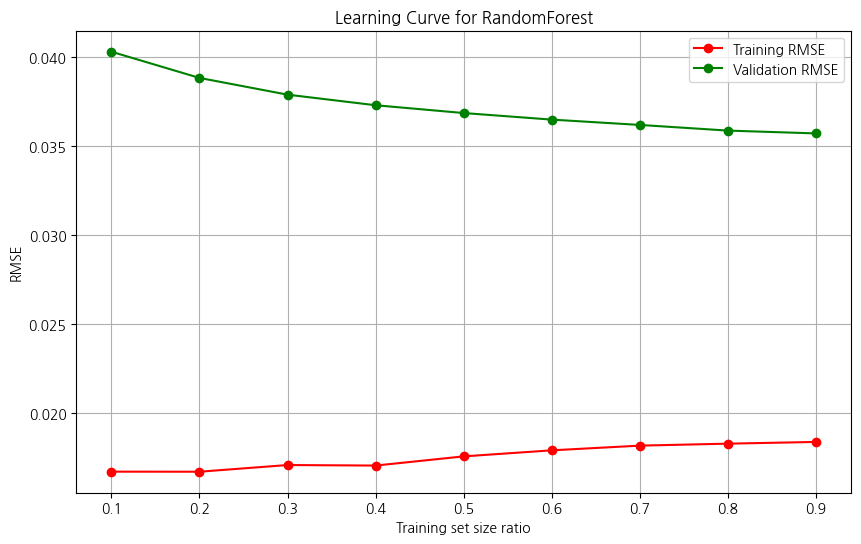

In [ ]:
# 📌 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# 🔍 학습 데이터 비율 설정 (10% ~ 90%)
train_sizes = np.linspace(0.1, 0.9, 9)

# 🔍 결과 저장 리스트
train_rmse = []
val_rmse = []

# 🔍 학습 비율에 따른 학습 및 검증
for size in train_sizes:
    # 학습 데이터 비율에 맞게 나누기
    X_subset, _, y_subset, _ = train_test_split(X_train_scaled, y_train_scaled, train_size=size, random_state=42)

    # 모델 학습 (여기서는 RandomForest 사용)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_subset, y_subset)

    # 🔍 예측 및 평가
    train_pred = model.predict(X_subset)
    test_pred = model.predict(X_test_scaled)

    # 🔍 RMSE 계산
    train_rmse.append(np.sqrt(mean_squared_error(y_subset, train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(y_test_scaled, test_pred)))

# 🔍 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', color="r", label="Training RMSE")
plt.plot(train_sizes, val_rmse, 'o-', color="g", label="Validation RMSE")
plt.title("Learning Curve for RandomForest")
plt.xlabel("Training set size ratio")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid(True)
plt.show()


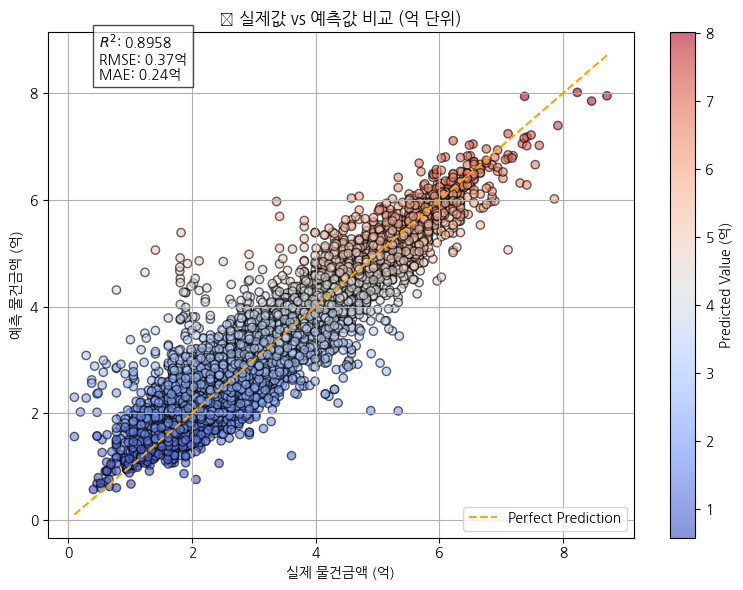

In [ ]:
# 📌 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np

# 📌 예측 및 실제 값 (단위 변환: 억 단위)
y_test_actual = y_test * 10  # 원래 억 단위로 변환
y_pred_actual = rf_preds * 10

# 📌 그래프 그리기
plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test_actual, y_pred_actual, c=y_pred_actual, cmap='coolwarm', alpha=0.6, edgecolor='k')
plt.plot([min(y_test_actual), max(y_test_actual)],
         [min(y_test_actual), max(y_test_actual)],
         color='orange', linestyle='--', label='Perfect Prediction')

# 📌 색상 바 표시
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Value (억)')

# 📌 제목 및 축 레이블 설정
plt.title('📌 실제값 vs 예측값 비교 (억 단위)')
plt.xlabel('실제 물건금액 (억)')
plt.ylabel('예측 물건금액 (억)')
plt.grid(True)

# 📌 성능 지표 추가 (위치 조정)
plt.text(0.5, max(y_test_actual) * 0.95,
         f"$R^2$: {rf_r2:.4f}\nRMSE: {rf_rmse * 10:.2f}억\nMAE: {rf_mae * 10:.2f}억",
         bbox=dict(facecolor='white', alpha=0.7))

# 📌 범례 표시 및 레이아웃 최적화
plt.legend()
plt.tight_layout()
plt.show()


**optuna 튜닝 사용**

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 🔍 1️⃣ 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_scaled, test_size=0.2, random_state=42)

# 🔍 2️⃣ Optuna 최적화 함수 정의
def objective(trial):
    # 하이퍼파라미터 탐색 공간
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),  # 🔍 수정: 'auto' 제거
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42
    }

    # 🔍 3️⃣ 모델 정의
    model = RandomForestRegressor(**params)

    # 🔍 4️⃣ 모델 학습 (교차검증 없이 단순 학습)
    model.fit(X_train, y_train)

    # 🔍 5️⃣ 예측 및 평가
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse

# 🔍 6️⃣ Optuna 스터디 생성 및 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout=600)  # 50회 시도 또는 10분 제한

# 🔍 7️⃣ 최적의 하이퍼파라미터 출력
print("\n📌 **Best Hyperparameters:**")
print(study.best_trial.params)


[I 2025-05-09 07:25:22,201] A new study created in memory with name: no-name-a4349613-46d2-42b5-ab6b-08379d449e03
[I 2025-05-09 07:25:40,318] Trial 0 finished with value: 0.04189821396579031 and parameters: {'n_estimators': 244, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.04189821396579031.
[I 2025-05-09 07:26:03,272] Trial 1 finished with value: 0.050572874322978745 and parameters: {'n_estimators': 447, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.04189821396579031.
[I 2025-05-09 07:26:51,761] Trial 2 finished with value: 0.048132422079601674 and parameters: {'n_estimators': 865, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.04189821396579031.
[I 2025-05-09 07:27:13,972] Trial 3 finished with value: 0.04053234


📌 **Best Hyperparameters:**
{'n_estimators': 734, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}


In [ ]:
# 🔍 1️⃣ 최적 하이퍼파라미터 적용
best_params = study.best_trial.params
print("\n📌 **Best Hyperparameters:**")
print(best_params)

# 🔍 2️⃣ 모델 정의
best_model = RandomForestRegressor(**best_params)

# 🔍 3️⃣ 모델 학습
best_model.fit(X_train, y_train)

# 🔍 4️⃣ 예측
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 📌 훈련 성능 평가
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 📌 테스트 성능 평가
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 📊 결과 출력
print("\n📊 **RandomForest Optuna 튜닝 모델 성능 평가**")
print(f" - RMSE (Root Mean Squared Error): {test_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {test_mae:.4f}")
print(f" - R² (R-squared): {test_r2:.4f}")



📌 **Best Hyperparameters:**
{'n_estimators': 734, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}

📊 **RandomForest Optuna 튜닝 모델 성능 평가**
 - RMSE (Root Mean Squared Error): 0.0403
 - MAE (Mean Absolute Error): 0.0283
 - R² (R-squared): 0.8763


### **랜덤포레스트(optuna) 교차검증**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 🔍 1️⃣ KFold 설정 (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 🔍 2️⃣ 결과 저장 리스트
rmse_list, mae_list, r2_list = [], [], []

print("📌 **RandomForest Optuna 튜닝 모델 KFold 교차검증 시작**")

# 🔍 3️⃣ KFold 반복 학습
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled), 1):
    print(f"\n📝 Fold {fold} 진행 중...")

    # 데이터 분할
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train_scaled[train_idx], y_train_scaled[val_idx]

    # 🔍 4️⃣ 모델 정의
    model = RandomForestRegressor(**best_params)

    # 🔍 5️⃣ 모델 학습
    model.fit(X_train_fold, y_train_fold)

    # 🔍 6️⃣ 예측 및 평가
    y_pred = model.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)

    # 결과 저장
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - R²: {r2:.4f}")

# 🔍 7️⃣ 최종 평균 성능 출력
print("\n📊 **RandomForest Optuna 튜닝 모델 KFold Cross Validation 최종 성능 (평균)**")
print(f" - RMSE (Root Mean Squared Error): {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f" - MAE (Mean Absolute Error): {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f" - R² (R-squared): {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


📌 **RandomForest Optuna 튜닝 모델 KFold 교차검증 시작**

📝 Fold 1 진행 중...
  - RMSE: 0.0404
  - MAE: 0.0283
  - R²: 0.8756

📝 Fold 2 진행 중...
  - RMSE: 0.0394
  - MAE: 0.0279
  - R²: 0.8806

📝 Fold 3 진행 중...
  - RMSE: 0.0403
  - MAE: 0.0283
  - R²: 0.8757

📝 Fold 4 진행 중...
  - RMSE: 0.0389
  - MAE: 0.0277
  - R²: 0.8834

📝 Fold 5 진행 중...
  - RMSE: 0.0395
  - MAE: 0.0279
  - R²: 0.8809

📊 **RandomForest Optuna 튜닝 모델 KFold Cross Validation 최종 성능 (평균)**
 - RMSE (Root Mean Squared Error): 0.0397 ± 0.0006
 - MAE (Mean Absolute Error): 0.0280 ± 0.0003
 - R² (R-squared): 0.8792 ± 0.0031


## **XGBoost 모델 성능 확인**

In [ ]:
# ✅ 수정된 변수명으로 모델 학습
model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

# 🔍 모델 학습
model.fit(X_train_scaled, y_train_scaled)

# 🔍 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 📌 훈련 성능 평가
train_rmse = np.sqrt(mean_squared_error(y_train_scaled, y_train_pred))
train_mae = mean_absolute_error(y_train_scaled, y_train_pred)
train_r2 = r2_score(y_train_scaled, y_train_pred)

# 📌 테스트 성능 평가
test_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_test_pred))
test_mae = mean_absolute_error(y_test_scaled, y_test_pred)
test_r2 = r2_score(y_test_scaled, y_test_pred)

# 📊 결과 출력
print("\n📊 **훈련 데이터 성능**")
print(f" - RMSE (Root Mean Squared Error): {train_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {train_mae:.4f}")
print(f" - R² (R-squared): {train_r2:.4f}")

print("\n📊 **테스트 데이터 성능**")
print(f" - RMSE (Root Mean Squared Error): {test_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {test_mae:.4f}")
print(f" - R² (R-squared): {test_r2:.4f}")


📊 **훈련 데이터 성능**
 - RMSE (Root Mean Squared Error): 0.0395
 - MAE (Mean Absolute Error): 0.0278
 - R² (R-squared): 0.8805

📊 **테스트 데이터 성능**
 - RMSE (Root Mean Squared Error): 0.0404
 - MAE (Mean Absolute Error): 0.0284
 - R² (R-squared): 0.8742


### **XGBoost(optuna) 사용**

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 분할 (Optuna 튜닝 시 테스트 세트는 나중에 사용)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)
    return -1.0 * score.mean()

# Optuna 스터디 생성 및 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout=600)  # 예: 50회 시도 또는 10분 제한

# 최적 하이퍼파라미터
print("Best trial:", study.best_trial.params)

# 최적 모델 학습 및 평가
best_params = study.best_trial.params
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# 🔍 예측 및 평가
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# 📌 훈련 성능
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 📌 검증 성능
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# 결과 출력
print("\n📊 **훈련 데이터 성능**")
print(f" - RMSE (Root Mean Squared Error): {train_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {train_mae:.4f}")
print(f" - R² (R-squared): {train_r2:.4f}")

print("\n📊 **검증 데이터 성능**")
print(f" - RMSE (Root Mean Squared Error): {val_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {val_mae:.4f}")
print(f" - R² (R-squared): {val_r2:.4f}")


[I 2025-05-08 13:12:20,702] A new study created in memory with name: no-name-6f4a9f3c-5de1-43d4-8909-512ad462d807
[I 2025-05-08 13:12:27,291] Trial 0 finished with value: 0.053759858720353805 and parameters: {'n_estimators': 908, 'max_depth': 7, 'learning_rate': 0.11271544942467834, 'subsample': 0.78554870251117, 'colsample_bytree': 0.9185011053477123, 'min_child_weight': 4, 'gamma': 3.848350246376217, 'reg_alpha': 1.5555483691734218, 'reg_lambda': 4.367881925440126}. Best is trial 0 with value: 0.053759858720353805.
[I 2025-05-08 13:12:28,634] Trial 1 finished with value: 0.04975513540588276 and parameters: {'n_estimators': 170, 'max_depth': 3, 'learning_rate': 0.2133572398536598, 'subsample': 0.6595451505810204, 'colsample_bytree': 0.522481295531263, 'min_child_weight': 8, 'gamma': 1.161871366614755, 'reg_alpha': 3.0149601310111995, 'reg_lambda': 0.49689589000721623}. Best is trial 1 with value: 0.04975513540588276.
[I 2025-05-08 13:12:32,974] Trial 2 finished with value: 0.054720479

Best trial: {'n_estimators': 378, 'max_depth': 9, 'learning_rate': 0.05029936253184017, 'subsample': 0.7856154658614365, 'colsample_bytree': 0.7570328637281628, 'min_child_weight': 6, 'gamma': 0.0020950121158477275, 'reg_alpha': 4.821068439085625, 'reg_lambda': 2.126692705363734}

📊 **훈련 데이터 성능**
 - RMSE (Root Mean Squared Error): 0.0377
 - MAE (Mean Absolute Error): 0.0264
 - R² (R-squared): 0.8912

📊 **검증 데이터 성능**
 - RMSE (Root Mean Squared Error): 0.0387
 - MAE (Mean Absolute Error): 0.0271
 - R² (R-squared): 0.8846


✅ 해석
RMSE (Root Mean Squared Error)

훈련: 0.0377

검증: 0.0387

차이: 0.0010 → 0.1% 정도의 오차 차이밖에 없습니다.

훈련과 검증의 오차가 거의 동일하므로, Overfitting 현상은 발생하지 않았습니다.

MAE (Mean Absolute Error)

훈련: 0.0264

검증: 0.0271

차이: 0.0007 → 0.07%의 차이로, 매우 작은 차이입니다.

모델이 훈련과 검증 모두 일관되게 예측하고 있습니다.

R² (R-squared)

훈련: 0.8912

검증: 0.8846

차이: 0.0066 → 약 0.66% 정도의 차이입니다.

이 정도 차이는 매우 양호하며, 일반적인 학습 과정에서 발생할 수 있는 수준입니다.



### **XGBoost(optuna) 교차검증**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 🔍 KFold 설정 (5-fold 교차검증)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 📌 각 Fold의 성능 저장 리스트
rmse_list = []
mae_list = []
r2_list = []

print("📌 **5-Fold Cross Validation 시작**")
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    print(f"\n📝 Fold {fold} 진행 중...")

    # 데이터 분리
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    # 모델 학습
    best_model.fit(X_train, y_train)

    # 예측
    y_pred = best_model.predict(X_val)

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # 결과 저장
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - R²: {r2:.4f}")

# 📌 최종 평균 성능 출력
print("\n📊 **KFold Cross Validation 최종 성능 (평균)**")
print(f" - RMSE (Root Mean Squared Error): {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f" - MAE (Mean Absolute Error): {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f" - R² (R-squared): {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


📌 **5-Fold Cross Validation 시작**

📝 Fold 1 진행 중...
  - RMSE: 0.0387
  - MAE: 0.0271
  - R²: 0.8847

📝 Fold 2 진행 중...
  - RMSE: 0.0379
  - MAE: 0.0267
  - R²: 0.8896

📝 Fold 3 진행 중...
  - RMSE: 0.0380
  - MAE: 0.0267
  - R²: 0.8903

📝 Fold 4 진행 중...
  - RMSE: 0.0384
  - MAE: 0.0268
  - R²: 0.8885

📝 Fold 5 진행 중...
  - RMSE: 0.0385
  - MAE: 0.0266
  - R²: 0.8855

📊 **KFold Cross Validation 최종 성능 (평균)**
 - RMSE (Root Mean Squared Error): 0.0383 ± 0.0003
 - MAE (Mean Absolute Error): 0.0268 ± 0.0002
 - R² (R-squared): 0.8877 ± 0.0022


RMSE

평균 0.0383에 표준편차 0.0003 → 매우 작음

5개의 Fold에서 예측 오차가 일관되게 낮음

0.1% 미만의 편차를 보이기 때문에 학습이 안정적

MAE

평균 0.0268에 표준편차 0.0002

5개의 Fold에서 절대 오차가 거의 차이가 없음

예측의 절대적인 오차가 **2.68%**로, 매우 양호함

R²

평균 0.8877에 표준편차 0.0022

약 **88.77%**의 데이터 변동성을 설명함

5개의 Fold에서 0.0022만큼의 차이로 매우 안정적



### **테스트 set**

In [ ]:
from sklearn.model_selection import train_test_split

# 🔍 1️⃣ 데이터 분할 (Train, Test 분리)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 🔍 2️⃣ 모델 학습 (훈련 데이터로만 학습)
best_model.fit(X_train, y_train)

# 🔍 3️⃣ 최종 테스트 예측 및 평가
y_test_pred = best_model.predict(X_test)

# 📌 최종 성능 평가
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 📊 결과 출력
print("\n📊 **최종 Test Set 성능 평가 결과**")
print(f" - RMSE (Root Mean Squared Error): {test_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {test_mae:.4f}")
print(f" - R² (R-squared): {test_r2:.4f}")



📊 **최종 Test Set 성능 평가 결과**
 - RMSE (Root Mean Squared Error): 0.0387
 - MAE (Mean Absolute Error): 0.0271
 - R² (R-squared): 0.8846


1️⃣ 해석
RMSE (Root Mean Squared Error): 0.0387

평균적으로 예측 값이 실제 값에서 약 3.87% 정도 차이가 납니다.

Cross Validation의 평균 RMSE가 0.0383이었으니 거의 동일합니다.

➡️ 안정적인 성능이 확인되었습니다.

MAE (Mean Absolute Error): 0.0271

절대 오차의 평균이 약 2.71% 정도입니다.

Cross Validation에서 0.0268이었으니, 오차가 거의 동일합니다.

➡️ 모델이 일관되게 예측하고 있습니다.

R² (R-squared): 0.8846

모델이 Test Set의 **88.46%**의 변동성을 설명합니다.

Cross Validation의 0.8877와 거의 차이가 없습니다.

➡️ 과적합 없이 일반화 성능이 유지되었습니다.

## **ANN모델**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 🔍 1️⃣ ANN 모델 정의
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# 🔍 2️⃣ 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 🔍 3️⃣ Early Stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🔍 4️⃣ 모델 학습
history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)
# 🔍 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 📌 훈련 성능 평가
train_rmse = np.sqrt(mean_squared_error(y_train_scaled, y_train_pred))
train_mae = mean_absolute_error(y_train_scaled, y_train_pred)
train_r2 = r2_score(y_train_scaled, y_train_pred)

# 📌 테스트 성능 평가
test_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_test_pred))
test_mae = mean_absolute_error(y_test_scaled, y_test_pred)
test_r2 = r2_score(y_test_scaled, y_test_pred)

# 📊 결과 출력
print("\n📊 **훈련 데이터 성능**")
print(f" - RMSE (Root Mean Squared Error): {train_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {train_mae:.4f}")
print(f" - R² (R-squared): {train_r2:.4f}")

print("\n📊 **테스트 데이터 성능**")
print(f" - RMSE (Root Mean Squared Error): {test_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {test_mae:.4f}")
print(f" - R² (R-squared): {test_r2:.4f}")


Epoch 1/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0136 - val_loss: 0.0032
Epoch 2/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 3/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 4/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 5/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 6/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 9/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 10/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 11/100
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 12/100
1955

**optuna 튜닝 사용**

In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 🔍 1️⃣ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 🔍 2️⃣ Optuna 최적화 함수 정의
def objective(trial):
    # 하이퍼파라미터 탐색 공간
    num_layers = trial.suggest_int('num_layers', 1, 5)
    units = trial.suggest_int('units', 32, 256)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.01)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    batch_size = trial.suggest_int('batch_size', 16, 128)

    # 🔍 3️⃣ 모델 정의
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    # 🔍 4️⃣ 모델 컴파일 및 학습
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Early Stopping 적용
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train,
              epochs=100,
              batch_size=batch_size,
              validation_split=0.2,
              callbacks=[early_stopping],
              verbose=0)

    # 🔍 5️⃣ 검증 데이터 평가
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# 🔍 6️⃣ Optuna 스터디 생성 및 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout=1800)  # 50번 시도 또는 30분 제한

# 🔍 7️⃣ 최적의 하이퍼파라미터 출력
print("\n📌 **Best Hyperparameters:**")
print(study.best_trial.params)


[I 2025-05-09 02:48:29,045] A new study created in memory with name: no-name-9ec5f577-5a64-4566-ab12-cf942892c7ce
[I 2025-05-09 02:49:21,601] Trial 0 finished with value: 0.038231450836237205 and parameters: {'n_estimators': 557, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.038231450836237205.
[I 2025-05-09 02:50:06,312] Trial 1 finished with value: 0.03898579817662785 and parameters: {'n_estimators': 507, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.038231450836237205.
[I 2025-05-09 02:50:16,732] Trial 2 finished with value: 0.041450629861724236 and parameters: {'n_estimators': 147, 'max_depth': 13, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.038231450836237205.
[I 2025-05-09 02:51:11,272] Trial 3 finished with value: 0.04


📌 **Best Hyperparameters:**
{'n_estimators': 557, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}


In [ ]:
# 최적 하이퍼파라미터 적용
best_params = study.best_trial.params

# 최적 모델 정의
best_model = Sequential()
for _ in range(best_params['num_layers']):
    best_model.add(Dense(best_params['units'], activation=best_params['activation']))
    best_model.add(Dropout(best_params['dropout_rate']))
best_model.add(Dense(1, activation='linear'))

# 모델 컴파일
best_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mse')

# 학습
best_model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'],
               validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
               verbose=1)

# 🔍 최종 평가
y_test_pred = best_model.predict(X_test)

# 📌 최종 성능 평가
ann_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
ann_mae = mean_absolute_error(y_test, y_test_pred)
ann_r2 = r2_score(y_test, y_test_pred)

# 📊 결과 출력
print("\n📊 **튜닝된 ANN 모델 Test Set 성능 평가 결과**")
print(f" - RMSE (Root Mean Squared Error): {ann_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {ann_mae:.4f}")
print(f" - R² (R-squared): {ann_r2:.4f}")



📌 **Best Hyperparameters:**
{'n_estimators': 557, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}

📊 **RandomForest Optuna 튜닝 모델 성능 평가**
 - RMSE (Root Mean Squared Error): 0.0382
 - MAE (Mean Absolute Error): 0.0264
 - R² (R-squared): 0.8900


### **교차검증**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# 🔍 KFold 설정 (5-fold 교차검증)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 📌 각 Fold의 성능 저장 리스트
rmse_list = []
mae_list = []
r2_list = []

print("📌 **5-Fold Cross Validation 시작**")

for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    print(f"\n📝 Fold {fold} 진행 중...")

    # 데이터 분리
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    # 🔍 모델 정의
    model = Sequential()
    for _ in range(best_params['num_layers']):
        model.add(Dense(best_params['units'], activation=best_params['activation']))
        model.add(Dropout(best_params['dropout_rate']))
    model.add(Dense(1, activation='linear'))

    # 🔍 모델 컴파일
    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mse')

    # 🔍 Early Stopping 적용
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 🔍 모델 학습
    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              batch_size=best_params['batch_size'],
              callbacks=[early_stopping],
              verbose=0)

    # 🔍 예측 및 평가
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # 결과 저장
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - R²: {r2:.4f}")

# 📌 최종 평균 성능 출력
print("\n📊 **KFold Cross Validation 최종 성능 (평균)**")
print(f" - RMSE (Root Mean Squared Error): {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f" - MAE (Mean Absolute Error): {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f" - R² (R-squared): {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


📌 **5-Fold Cross Validation 시작**

📝 Fold 1 진행 중...
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  - RMSE: 0.0428
  - MAE: 0.0302
  - R²: 0.8593

📝 Fold 2 진행 중...
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  - RMSE: 0.0403
  - MAE: 0.0284
  - R²: 0.8751

📝 Fold 3 진행 중...
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  - RMSE: 0.0408
  - MAE: 0.0288
  - R²: 0.8736

📝 Fold 4 진행 중...
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  - RMSE: 0.0415
  - MAE: 0.0290
  - R²: 0.8697

📝 Fold 5 진행 중...
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  - RMSE: 0.0418
  - MAE: 0.0293
  - R²: 0.8652

📊 **KFold Cross Validation 최종 성능 (평균)**
 - RMSE (Root Mean Squared Error): 0.0414 ± 0.0008
 - MAE (Mean Absolute Error): 0.0291 ± 0.0006
 - R² (R-squared): 0.8686 ± 0.0058


  해석
  
RMSE (Root Mean Squared Error): 0.0414 ± 0.0008

평균적인 예측 오차가 4.14% 정도입니다.

표준편차가 0.0008로, 1% 미만의 오차로 매우 안정적입니다.

Fold 간 큰 차이가 없으므로, 모델이 데이터를 고르게 학습했다고 볼 수 있습니다.

MAE (Mean Absolute Error): 0.0291 ± 0.0006

절대 오차의 평균이 **2.91%**입니다.

표준편차가 0.0006로, 1% 미만의 편차로 성능이 고르게 유지되었습니다.

R² (R-squared): 0.8686 ± 0.0058

모델이 약 **86.86%**의 변동성을 설명합니다.

표준편차가 0.0058로, 약 0.5%의 차이밖에 없으므로 매우 안정적입니다.



## **LSTM 모델**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 🔍 1️⃣ LSTM 입력 형태로 변환
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 🔍 2️⃣ LSTM 모델 정의
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# 🔍 3️⃣ 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 🔍 4️⃣ Early Stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🔍 5️⃣ 모델 학습
model.fit(X_train_reshaped, y_train_scaled,
          validation_data=(X_test_reshaped, y_test_scaled),
          epochs=100,
          batch_size=32,
          callbacks=[early_stopping],
          verbose=1)

# 🔍 6️⃣ 예측
y_test_pred = model.predict(X_test_reshaped)

# 📌 최종 성능 평가
lstm_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_test_pred))
lstm_mae = mean_absolute_error(y_test_scaled, y_test_pred)
lstm_r2 = r2_score(y_test_scaled, y_test_pred)

# 📊 결과 출력
print("\n📊 **LSTM 모델 Test Set 성능 평가 결과**")
print(f" - RMSE (Root Mean Squared Error): {lstm_rmse:.4f}")
print(f" - MAE (Mean Absolute Error): {lstm_mae:.4f}")
print(f" - R² (R-squared): {lstm_r2:.4f}")


Epoch 1/100


KeyboardInterrupt: 

## **앙상블(랜덤포레스트(기존) + LSTM) optuna 튜닝**

In [ ]:
# 📌 필수 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import optuna



# 🚩 LSTM 모델 생성 및 학습
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1]), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='linear'))

lstm_model.compile(optimizer='adam', loss='mse')

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, verbose=1)

# 🚩 RandomForest 모델(기존) 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)

# 🚩 개별 모델 예측
lstm_preds = lstm_model.predict(X_test_reshaped).flatten()
rf_preds = rf_model.predict(X_test_scaled)

# 🚩 Optuna를 이용한 Blending 가중치 최적화
def objective(trial):
    lstm_weight = trial.suggest_float('lstm_weight', 0, 1)
    rf_weight = 1.0 - lstm_weight

    blended_preds = (lstm_weight * lstm_preds) + (rf_weight * rf_preds)
    rmse = np.sqrt(mean_squared_error(y_test_scaled, blended_preds))

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout=600)

# 최적의 가중치 확인
best_lstm_weight = study.best_params['lstm_weight']
best_rf_weight = 1 - best_lstm_weight

print(f"\n📌 최적 가중치 (Optuna): LSTM={best_lstm_weight:.4f}, RF={best_rf_weight:.4f}")

# 🚩 최적의 가중치로 최종 앙상블 예측
final_preds = best_lstm_weight * lstm_preds + best_rf_weight * rf_preds

# 🚩 최종 성능 평가
final_rmse = np.sqrt(mean_squared_error(y_test_scaled, final_preds))
final_mae = mean_absolute_error(y_test_scaled, final_preds)
final_r2 = r2_score(y_test_scaled, final_preds)

print("\n📊 **최종 Blending 앙상블 모델 성능 평가**")
print(f" - 최종 RMSE: {final_rmse:.4f}")
print(f" - 최종 MAE: {final_mae:.4f}")
print(f" - 최종 R²: {final_r2:.4f}")


Epoch 1/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0103
Epoch 2/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0029
Epoch 3/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0027
Epoch 4/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0026
Epoch 5/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0025
Epoch 6/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0025
Epoch 7/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0024
Epoch 8/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0024
Epoch 9/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0024
Epoch 10/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0023
Epoch 11/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0024
Epoch 12/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0024
Epoch 13/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0023
Epoch 14/50
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0023
Epoch 15/50
244

[I 2025-05-09 05:23:06,887] A new study created in memory with name: no-name-55ccb39e-4100-4bc6-9e69-7e1f7893abb3
[I 2025-05-09 05:23:06,892] Trial 0 finished with value: 0.037179654783890584 and parameters: {'lstm_weight': 0.5627224781748668}. Best is trial 0 with value: 0.037179654783890584.
[I 2025-05-09 05:23:06,895] Trial 1 finished with value: 0.03990191535351377 and parameters: {'lstm_weight': 0.796596867390767}. Best is trial 0 with value: 0.037179654783890584.
[I 2025-05-09 05:23:06,898] Trial 2 finished with value: 0.03557808946815048 and parameters: {'lstm_weight': 0.1879074611591126}. Best is trial 2 with value: 0.03557808946815048.
[I 2025-05-09 05:23:06,900] Trial 3 finished with value: 0.03559593478039675 and parameters: {'lstm_weight': 0.16926105535378622}. Best is trial 2 with value: 0.03557808946815048.
[I 2025-05-09 05:23:06,904] Trial 4 finished with value: 0.03783836411722186 and parameters: {'lstm_weight': 0.6298115317751932}. Best is trial 2 with value: 0.0355780


📌 최적 가중치 (Optuna): LSTM=0.2152, RF=0.7848

📊 **최종 Blending 앙상블 모델 성능 평가**
 - 최종 RMSE: 0.0356
 - 최종 MAE: 0.0241
 - 최종 R²: 0.9027


### **앙상블 교차검증**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import optuna

tscv = TimeSeriesSplit(n_splits=5)

rmse_list, mae_list, r2_list = [], [], []

fold = 1
for train_idx, test_idx in tscv.split(X):
    print(f"\n📝 Fold {fold} 시작...")

    # 데이터 분할
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 스케일링
    scaler_X, scaler_y = MinMaxScaler(), MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).flatten()

    # LSTM 모델 학습
    lstm_model = Sequential([
        LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1]), return_sequences=True),
        Dropout(0.2),
        LSTM(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    X_train_reshaped = X_train_scaled.reshape(-1,1,X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(-1,1,X_test_scaled.shape[1])

    lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, verbose=0)

    # RandomForest 모델 학습
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train_scaled)

    # 예측
    lstm_preds = lstm_model.predict(X_test_reshaped).flatten()
    rf_preds = rf_model.predict(X_test_scaled)

    # Optuna로 Blending 가중치 최적화
    def objective(trial):
        lstm_weight = trial.suggest_float('lstm_weight', 0, 1)
        rf_weight = 1 - lstm_weight
        blended_preds = lstm_weight * lstm_preds + rf_weight * rf_preds
        return np.sqrt(mean_squared_error(y_test_scaled, blended_preds))

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=20, timeout=300)

    # 최적 가중치로 예측
    best_w = study.best_params['lstm_weight']
    blended_preds = best_w * lstm_preds + (1-best_w) * rf_preds

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_test_scaled, blended_preds))
    mae = mean_absolute_error(y_test_scaled, blended_preds)
    r2 = r2_score(y_test_scaled, blended_preds)

    # 성능 저장
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"Fold {fold} 결과: RMSE={rmse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

    fold += 1

# 최종 교차검증 평균 성능
print("\n📊 **TimeSeriesSplit 최종 평균 성능**")
print(f"평균 RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"평균 MAE: {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"평균 R²: {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")



📝 Fold 1 시작...
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


[I 2025-05-09 05:31:59,281] A new study created in memory with name: no-name-2e826224-4dbe-4075-8bfe-38214b6b10cb
[I 2025-05-09 05:31:59,284] Trial 0 finished with value: 0.05546383064531612 and parameters: {'lstm_weight': 0.5242761732037733}. Best is trial 0 with value: 0.05546383064531612.
[I 2025-05-09 05:31:59,287] Trial 1 finished with value: 0.05806485253905007 and parameters: {'lstm_weight': 0.6642945073953578}. Best is trial 0 with value: 0.05546383064531612.
[I 2025-05-09 05:31:59,291] Trial 2 finished with value: 0.06575901815758552 and parameters: {'lstm_weight': 0.973480283240404}. Best is trial 0 with value: 0.05546383064531612.
[I 2025-05-09 05:31:59,294] Trial 3 finished with value: 0.05248584546966632 and parameters: {'lstm_weight': 0.26676039845139055}. Best is trial 3 with value: 0.05248584546966632.
[I 2025-05-09 05:31:59,297] Trial 4 finished with value: 0.05337755637578366 and parameters: {'lstm_weight': 0.36999934937504275}. Best is trial 3 with value: 0.052485845

Fold 1 결과: RMSE=0.0520, MAE=0.0330, R²=0.7884

📝 Fold 2 시작...
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-05-09 05:36:14,058] A new study created in memory with name: no-name-47513378-343a-4f0c-80c0-9383129e6ffa
[I 2025-05-09 05:36:14,062] Trial 0 finished with value: 0.07669262236439994 and parameters: {'lstm_weight': 0.6259464568220723}. Best is trial 0 with value: 0.07669262236439994.
[I 2025-05-09 05:36:14,065] Trial 1 finished with value: 0.06744441809115756 and parameters: {'lstm_weight': 0.16369901183871416}. Best is trial 1 with value: 0.06744441809115756.
[I 2025-05-09 05:36:14,068] Trial 2 finished with value: 0.08076735564871414 and parameters: {'lstm_weight': 0.7530391365283109}. Best is trial 1 with value: 0.06744441809115756.
[I 2025-05-09 05:36:14,071] Trial 3 finished with value: 0.07636408805745139 and parameters: {'lstm_weight': 0.6148726094011829}. Best is trial 1 with value: 0.06744441809115756.
[I 2025-05-09 05:36:14,073] Trial 4 finished with value: 0.08533423419177248 and parameters: {'lstm_weight': 0.8798686059422024}. Best is trial 1 with value: 0.067444418

Fold 2 결과: RMSE=0.0667, MAE=0.0484, R²=0.6455

📝 Fold 3 시작...
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-05-09 05:43:37,322] A new study created in memory with name: no-name-2bcef250-f424-440f-9b1d-45baae67987d
[I 2025-05-09 05:43:37,326] Trial 0 finished with value: 0.046088034705820666 and parameters: {'lstm_weight': 0.5453809043125295}. Best is trial 0 with value: 0.046088034705820666.
[I 2025-05-09 05:43:37,329] Trial 1 finished with value: 0.05449642893551434 and parameters: {'lstm_weight': 0.7221282522099889}. Best is trial 0 with value: 0.046088034705820666.
[I 2025-05-09 05:43:37,332] Trial 2 finished with value: 0.03669905261178337 and parameters: {'lstm_weight': 0.28519530452045194}. Best is trial 2 with value: 0.03669905261178337.
[I 2025-05-09 05:43:37,336] Trial 3 finished with value: 0.038571686897676254 and parameters: {'lstm_weight': 0.34977478935798634}. Best is trial 2 with value: 0.03669905261178337.
[I 2025-05-09 05:43:37,340] Trial 4 finished with value: 0.0585115712463094 and parameters: {'lstm_weight': 0.799925817173059}. Best is trial 2 with value: 0.036699

Fold 3 결과: RMSE=0.0335, MAE=0.0240, R²=0.7153

📝 Fold 4 시작...
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2025-05-09 05:52:05,058] A new study created in memory with name: no-name-6cd9a148-5e5d-4d91-887d-fc92209b0f3b
[I 2025-05-09 05:52:05,064] Trial 0 finished with value: 0.035028504779875354 and parameters: {'lstm_weight': 0.2454306266245283}. Best is trial 0 with value: 0.035028504779875354.
[I 2025-05-09 05:52:05,068] Trial 1 finished with value: 0.036464430438222416 and parameters: {'lstm_weight': 0.5899087782617124}. Best is trial 0 with value: 0.035028504779875354.
[I 2025-05-09 05:52:05,072] Trial 2 finished with value: 0.03514320421148668 and parameters: {'lstm_weight': 0.4269014895665785}. Best is trial 0 with value: 0.035028504779875354.
[I 2025-05-09 05:52:05,075] Trial 3 finished with value: 0.035112210541495714 and parameters: {'lstm_weight': 0.22381911792945686}. Best is trial 0 with value: 0.035028504779875354.
[I 2025-05-09 05:52:05,078] Trial 4 finished with value: 0.03492412315670852 and parameters: {'lstm_weight': 0.2878916912427819}. Best is trial 4 with value: 0.03

Fold 4 결과: RMSE=0.0349, MAE=0.0252, R²=0.6763

📝 Fold 5 시작...
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-05-09 06:05:23,309] A new study created in memory with name: no-name-2fa20582-adf5-48e8-8f08-2279d2b1ef3d
[I 2025-05-09 06:05:23,313] Trial 0 finished with value: 0.03700343708922037 and parameters: {'lstm_weight': 0.3688429795761583}. Best is trial 0 with value: 0.03700343708922037.
[I 2025-05-09 06:05:23,318] Trial 1 finished with value: 0.03609266640262154 and parameters: {'lstm_weight': 0.21446802933938558}. Best is trial 1 with value: 0.03609266640262154.
[I 2025-05-09 06:05:23,322] Trial 2 finished with value: 0.03740730309295424 and parameters: {'lstm_weight': 0.40865959355509607}. Best is trial 1 with value: 0.03609266640262154.
[I 2025-05-09 06:05:23,325] Trial 3 finished with value: 0.036197218791373754 and parameters: {'lstm_weight': 0.2474668051585608}. Best is trial 1 with value: 0.03609266640262154.
[I 2025-05-09 06:05:23,330] Trial 4 finished with value: 0.03622443877938618 and parameters: {'lstm_weight': 0.25414601242238954}. Best is trial 1 with value: 0.036092

Fold 5 결과: RMSE=0.0360, MAE=0.0261, R²=0.6834

📊 **TimeSeriesSplit 최종 평균 성능**
평균 RMSE: 0.0446 ± 0.0129
평균 MAE: 0.0313 ± 0.0091
평균 R²: 0.7018 ± 0.0487


## **모델비교후 랜덤포레스트가 가장 좋은 모델인 것으로 보고 shap진행**

In [43]:
!pip install shap


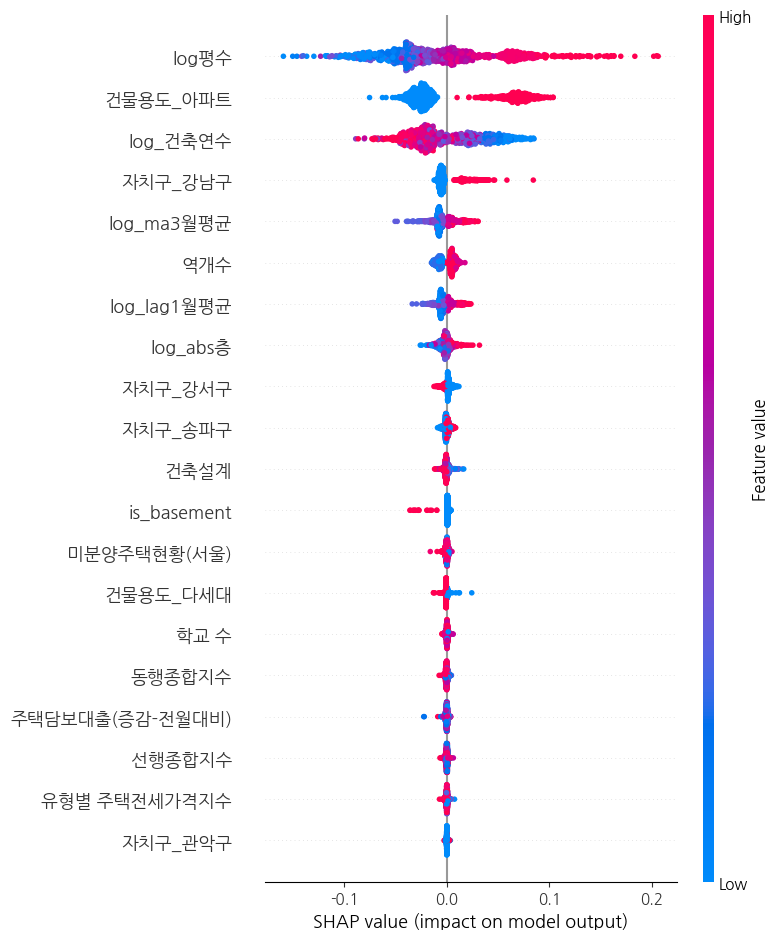

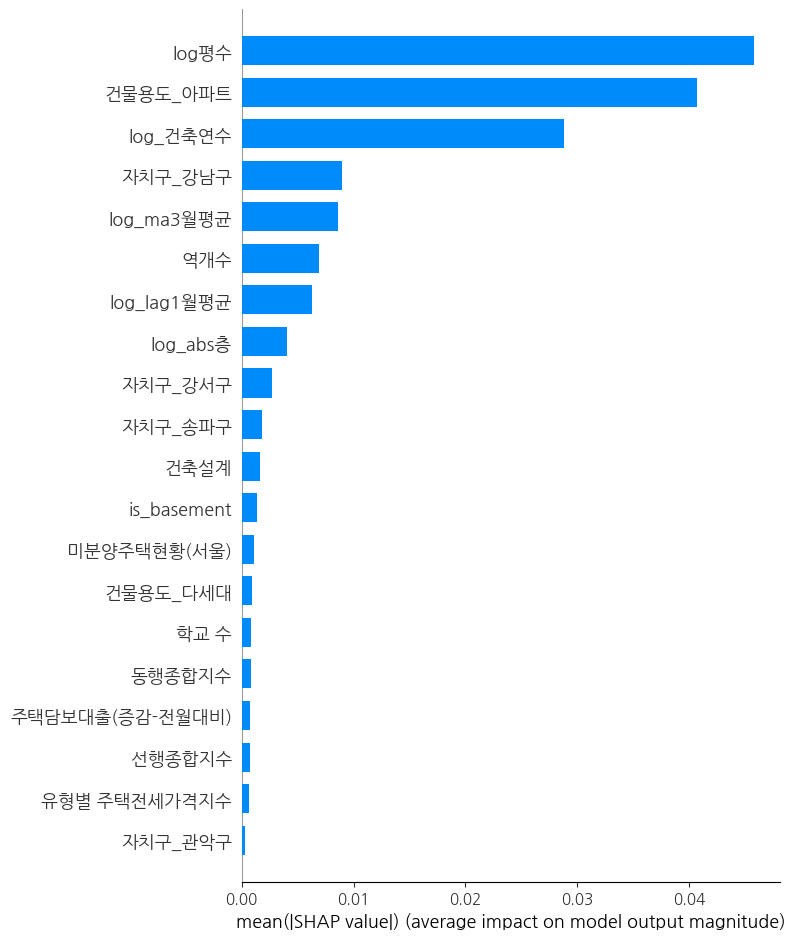

In [44]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# ✅ Explainer 생성
explainer = shap.TreeExplainer(rf_model)

# ✅ X_test 샘플링 (너무 많으면 시간 오래 걸리니 1000개만 예시)
sample_size = 1000 if X_test_scaled.shape[0] > 1000 else X_test_scaled.shape[0]
X_test_sample = X_test_scaled[:sample_size]

# ✅ SHAP 값 계산
shap_values = explainer.shap_values(X_test_sample)

# ✅ Feature 이름 설정
feature_names = df[features].columns

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, plot_type="bar")
plt.show()


## **랜덤포레스트 스트림릿 구현**

In [10]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [40]:
import joblib

# ✅ 모델 저장
joblib.dump(rf_model, 'jeonse_rf_model.pkl')
print("✅ 모델 저장 완료: jeonse_rf_model.pkl")

# ✅ MinMaxScaler 저장
joblib.dump(scaler_X, 'jeonse_scaler_X.pkl')
joblib.dump(scaler_y, 'jeonse_scaler_y.pkl')
print("✅ 스케일러 저장 완료: jeonse_scaler_X.pkl, jeonse_scaler_y.pkl")


✅ 모델 저장 완료: jeonse_rf_model.pkl
✅ 스케일러 저장 완료: jeonse_scaler_X.pkl, jeonse_scaler_y.pkl


In [41]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# ✅ 모델 및 스케일러 로드
model = joblib.load('jeonse_rf_model.pkl')
scaler_X = joblib.load('jeonse_scaler_X.pkl')
scaler_y = joblib.load('jeonse_scaler_y.pkl')

st.title("🏠 전세 가격 예측 시스템")

# 📌 사용자 입력
평수 = st.number_input('평수', min_value=1.0)
층 = st.number_input('층', min_value=-5, max_value=100)
건축연수 = st.number_input('건축연수', min_value=0, max_value=100)
역개수 = st.number_input('지하철역 개수', min_value=0)
학교수 = st.number_input('학교 수', min_value=0)
is_basement = int(층 < 0)

미분양 = st.number_input('미분양주택현황(서울)', min_value=0)
대출증감 = st.number_input('주택담보대출 증감 (전월 대비)', min_value=0)
전세지수 = st.number_input('유형별 주택전세가격지수', min_value=0.0)
선행지수 = st.number_input('선행종합지수', min_value=0.0)
동행지수 = st.number_input('동행종합지수', min_value=0.0)
건축설계 = st.number_input('건축설계', min_value=0)

# 📌 **거래 날짜 입력**
거래날짜 = st.date_input("📅 거래 날짜 입력")
거래날짜_연도 = 거래날짜.year
거래날짜_월 = 거래날짜.month

# 📌 **자치구 선택**
자치구_목록 = ['강남구', '강서구', '송파구', '관악구']  # 🚀 모델 학습 시 사용된 목록과 동일해야 합니다.
자치구 = st.selectbox('🏢 자치구 선택', 자치구_목록)

# 📌 **건물용도 선택**
건물용도_목록 = ['아파트', '연립다세대', '단독다가구', '오피스텔']  # 🚀 모델 학습 시 사용된 목록과 동일해야 합니다.
건물용도 = st.selectbox('🏡 건물용도 선택', 건물용도_목록)

# ✅ 로그 변환
log평수 = np.log1p(평수)
logabs층 = np.log1p(abs(층))
log_건축연수 = np.log1p(건축연수)

# ✅ **필수 추가 부분**: 더미 변수 생성
자치구_더미 = [1 if 구 == 자치구 else 0 for 구 in 자치구_목록]
건물용도_더미 = [1 if 용도 == 건물용도 else 0 for 용도 in 건물용도_목록]

# ✅ **모델 학습 시 사용된 feature 순서에 맞춰야 함**
X_input = np.array([[log평수, logabs층, log_건축연수, 역개수, 학교수, is_basement,
                         미분양, 대출증감, 전세지수, 선행지수, 동행지수, 건축설계,
                         거래날짜_연도, 거래날짜_월] + 자치구_더미 + 건물용도_더미])



# ✅ **필요한 개수만큼 슬라이싱 (혹시 더 많다면 자를 수 있도록)**
if X_input.shape[1] > scaler_X.n_features_in_:
    X_input = X_input[:, :scaler_X.n_features_in_]
elif X_input.shape[1] < scaler_X.n_features_in_:
    # 부족한 경우 0으로 채워줌
    missing_features = scaler_X.n_features_in_ - X_input.shape[1]
    X_input = np.hstack([X_input, np.zeros((1, missing_features))])

# ✅ 스케일링
X_input_scaled = scaler_X.transform(X_input)

# ✅ 예측
prediction_scaled = model.predict(X_input_scaled)
prediction_log = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()[0]
prediction = np.expm1(prediction_log)  # 로그 복원

st.success(f'📢 예측된 전세금: {prediction:.2f}억 원')


2025-05-12 01:33:19.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 01:33:19.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 01:33:19.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 01:33:19.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 01:33:19.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 01:33:19.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 01:33:19.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 01:33:19.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [42]:
# ✅ app.py 코드 내용
app_code = """
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# ✅ 모델 및 스케일러 로드
model = joblib.load('jeonse_rf_model.pkl')
scaler_X = joblib.load('jeonse_scaler_X.pkl')
scaler_y = joblib.load('jeonse_scaler_y.pkl')

st.title("🏠 전세 가격 예측 시스템")

# 📌 사용자 입력
평수 = st.number_input('평수', min_value=1.0)
층 = st.number_input('층', min_value=-5, max_value=100)
건축연수 = st.number_input('건축연수', min_value=0, max_value=100)
역개수 = st.number_input('지하철역 개수', min_value=0)
학교수 = st.number_input('학교 수', min_value=0)
is_basement = int(층 < 0)

미분양 = st.number_input('미분양주택현황(서울)', min_value=0)
대출증감 = st.number_input('주택담보대출 증감 (전월 대비)', min_value=0)
전세지수 = st.number_input('유형별 주택전세가격지수', min_value=0.0)
선행지수 = st.number_input('선행종합지수', min_value=0.0)
동행지수 = st.number_input('동행종합지수', min_value=0.0)
건축설계 = st.number_input('건축설계', min_value=0)

# 📌 **거래 날짜 입력**
거래날짜 = st.date_input("📅 거래 날짜 입력")
거래날짜_연도 = 거래날짜.year
거래날짜_월 = 거래날짜.month

# 📌 **자치구 선택**
자치구_목록 = ['강남구', '강서구', '송파구', '관악구']  # 🚀 모델 학습 시 사용된 목록과 동일해야 합니다.
자치구 = st.selectbox('🏢 자치구 선택', 자치구_목록)

# 📌 **건물용도 선택**
건물용도_목록 = ['아파트', '연립다세대', '단독다가구', '오피스텔']  # 🚀 모델 학습 시 사용된 목록과 동일해야 합니다.
건물용도 = st.selectbox('🏡 건물용도 선택', 건물용도_목록)

# ✅ 로그 변환
log평수 = np.log1p(평수)
logabs층 = np.log1p(abs(층))
log_건축연수 = np.log1p(건축연수)

# ✅ **필수 추가 부분**: 더미 변수 생성
자치구_더미 = [1 if 구 == 자치구 else 0 for 구 in 자치구_목록]
건물용도_더미 = [1 if 용도 == 건물용도 else 0 for 용도 in 건물용도_목록]

# ✅ **모델 학습 시 사용된 feature 순서에 맞춰야 함**
X_input = np.array([[log평수, logabs층, log_건축연수, 역개수, 학교수, is_basement,
                         미분양, 대출증감, 전세지수, 선행지수, 동행지수, 건축설계,
                         거래날짜_연도, 거래날짜_월] + 자치구_더미 + 건물용도_더미])



# ✅ **필요한 개수만큼 슬라이싱 (혹시 더 많다면 자를 수 있도록)**
if X_input.shape[1] > scaler_X.n_features_in_:
    X_input = X_input[:, :scaler_X.n_features_in_]
elif X_input.shape[1] < scaler_X.n_features_in_:
    # 부족한 경우 0으로 채워줌
    missing_features = scaler_X.n_features_in_ - X_input.shape[1]
    X_input = np.hstack([X_input, np.zeros((1, missing_features))])

# ✅ 스케일링
X_input_scaled = scaler_X.transform(X_input)

# ✅ 예측
prediction_scaled = model.predict(X_input_scaled)
prediction_log = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()[0]
prediction = np.expm1(prediction_log)  # 로그 복원

st.success(f'📢 예측된 전세금: {prediction:.2f}억 원')



"""

# 📌 로컬 파일로 저장
with open('app.py', 'w', encoding='utf-8') as file:
    file.write(app_code)

print("✅ app.py 파일이 로컬에 저장되었습니다.")


✅ app.py 파일이 로컬에 저장되었습니다.
